In [39]:
#from numba import jit, cuda
import multiprocessing
print("Number of cpu : ", multiprocessing.cpu_count())
import time
start=time.time()
from timeit import default_timer as timer 
import sys, os
sys.stdout.flush()
import numpy as np
from gwbench import network
from gwbench import basic_relations as br
import matplotlib.pyplot as plt
#from gwbench import io_mod as io
import scipy
#import scipy.signal
from gwbench.basic_constants import Mpc, Msun, GNewton, cLight
def ChirpTime(fs, Mc):
    Mc *= GNewton/cLight**3 * Msun
    fn = np.asarray([fs]) if np.isscalar(fs) else np.asarray(fs)
    return ((5./256.) / (Mc**(5./3.) * (np.pi * fn)**(8./3.)))
'''
def funz(y, a, b):
    return [y**3 + 2*b*(1-y**2)-y*(1+a**2), 3*y**2 -2*b*2*y-(1+a**2)]
asse=np.arange(-1, 1, 0.001)


def zeri(fp, fc, psi, thresh=0.005):
    a=fp*np.sin(2*psi)+fc*np.cos(2*psi)
    b=-fp*np.cos(2*psi)+fc*np.sin(2*psi)
    for ips in np.flip(np.arange (-1.0, 1.0, 0.1)):
        back=-9999.9
        while (abs(funz(ips, a, b)[0]) >= thresh and abs(ips-back)>=thresh):
            back=ips
            ips=ips-(funz(ips,a,b)[0]/funz(ips,a,b)[1])
            #print(ips)
        if abs(ips)<1.0:
            break
    return [ips, np.sqrt((a**2)/(1-ips**2))]

def fscalar(fplus, fcross, psi):
    r = (1-fcross)/np.sin(2*psi) + (fplus*np.sin(2*psi) + fcross*np.cos(2*psi))/np.tan(2*psi)
    s = (1+fplus)/np.cos(2*psi) - (fplus*np.sin(2*psi) + fcross*np.cos(2*psi))*np.tan(2*psi)
    return [r,s]

def fx(theta, phi, psi):
    res=-np.sin(theta)*np.sin(2*phi)*np.cos(psi) + np.sin(theta)*np.cos(theta)*np.sin(psi)*np.cos(2*phi)
    return res

def fy(theta, phi, psi):
    res=np.sin(theta)*np.sin(2*phi)*np.sin(psi) + np.sin(theta)*np.cos(theta)*np.cos(psi)*np.cos(2*phi)
    return res

def fscal(theta, phi, psi):
    res=0.5*(np.sin(theta)**2)*np.cos(2*phi)
    return res
'''
def setup_plot(figsize, xlabel, ylabel):
    """ @brief Initialize basic plot parameters
        @param figsize Figure size
        @param xlabel X-axis label
        @param ylabel Y-axis label
    """

    plt.figure(figsize=figsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
'''
def heatmap2d(arr, str):
    setup_plot((10,6), 'RA', 'DEC')
    #extent=[0,np.maximum(dets_coordinates2[:,:,0,2].reshape((len(decls)*len(ras),))),0,np.maximum(dets_coordinates2[:,:,0,3].reshape((len(decls)*len(ras),)))]
    plt.imshow(arr, origin='lower', extent=[0, 360, -90, 90] , cmap='viridis')

    plt.colorbar()
    plt.show()

decls=np.arange(-np.pi/2, np.pi/2, np.pi/180)

ras=np.arange(0., 2*np.pi, np.pi/180)
'''
from scipy.integrate import quad
in1 =20.
distanza_l= in1
Mc=35
def integr(zi):
    Ho=68.0
    c=300000.0
    Om=0.3
    Ok=0.0
    res=(c/Ho)*1/(np.sqrt(Om*(1+zi)**3 +  1-Om))
    return res
'''
def fun(z):

    Lsky=quad(integr,0,z,args=())[0]
    zer=distanza_l - (1+z)*Lsky
    return zer

redshifted=1
if redshifted:
    z_vec=scipy.optimize.root_scalar(fun, bracket=[0.0, 3]).root
    #print(z_vec)
    Mc *= (1. + z_vec)
'''
redshifted=1
'''
network_spec = ['ET_ET1','ET_ET2','ET_ET3', 'CE2-20-CBO_N', 'CE2-40-CBO_S']
network_spec2 = ['A+_H','A+_L', 'A+_V', 'A+_K' ]

dets={
    'A+_H': 0,
    'A+_L': 1,
    'A+_V': 2,
    'A+_K': 3
}
'''
file = open("gwbench/noise_curves/a_plus.txt", "r")

arr_str=str(file.read()).split("\n")
#print(arr_str[0])
for i in range (0, len(arr_str)):
    arr_str[i]=arr_str[i].split(' ')
arr_str.pop()
for i in range (0, len(arr_str)):
    #print(i)
    for j in (0, 1):
        arr_str[i][j]=float(arr_str[i][j])
arr_str=np.array(arr_str)
#print(arr_str)
noise1=np.transpose(arr_str)

#noise1[0,0]=5

file = open("gwbench/noise_curves/a_plus.txt", "r")

arr_str=str(file.read()).split("\n")
#print(arr_str[0])
for i in range (0, len(arr_str)):
    arr_str[i]=arr_str[i].split(' ')
arr_str.pop()
for i in range (0, len(arr_str)):
    #print(i)
    for j in (0, 1):
        arr_str[i][j]=float(arr_str[i][j])
arr_str=np.array(arr_str)
#print(arr_str)
noise2=np.transpose(arr_str)

#noise2[0,0]=5

file = open("gwbench/noise_curves/ce2_20km_cb.txt", "r")

arr_str=str(file.read()).split("\n")
#print(arr_str[0])
for i in range (0, len(arr_str)):
    arr_str[i]=arr_str[i].split(' ')
arr_str.pop()
for i in range (0, len(arr_str)):
    #print(i)
    for j in (0, 1):
        arr_str[i][j]=float(arr_str[i][j])
arr_str=np.array(arr_str)
#print(arr_str)
noise3=np.transpose(arr_str)
arr_str=None
#noise3[0,0]=3






cos = np.cos
sin = np.sin
exp = np.exp
PI = np.pi
from gwbench.basic_constants import time_fac, REarth, AU, cLight

def rrot_mat(angle,axis):
    c = np.cos(angle)
    s = np.sin(angle)

    if axis == 'i':
        return np.array( ( (1,0,0), (0,c,-s), (0,s,c) ) )
    if axis == 'j':
        return np.array( ( (c,0,s), (0,1,0), (-s,0,c) ) )
    if axis == 'k':
        return np.array( ( (c,-s,0), (s,c,0), (0,0,1) ) )

def ddet_angles(loc):
    # return alpha, beta, gamma in radians
    # alpha ... longitude
    # beta  ... pi/2 - latitude
    # gamma ... angle from 'Due East' to y-arm
    if loc == 'H':
        return -2.08406, PI/2.-0.810795, PI-5.65488
    elif loc == 'L':
        return -1.58431, PI/2.-0.533423, PI-4.40318
    elif loc in ('V','ET1','ET2','ET3'):
        return 0.183338, PI/2.-0.761512, PI-0.33916
    elif loc == 'K':
        return 2.3942, PI/2.-0.632682, PI-1.054113
    elif loc == 'I':
        return 1.334013, PI/2.-0.248418, PI-1.570796

    elif loc == 'C':
        return -1.969174, PI/2.-0.764918, 0.
    elif loc == 'N':
        return -2.1817, PI/2.-0.8029, 3*PI/4.
    elif loc == 'S':
        return -1.64061, PI/2.-0.50615, 0.

'''
def ddet_angles_NEW(loc):
    # return alpha, beta, gamma in radians
    # alpha ... longitude
    # beta  ... pi/2 - latitude
    # gamma ... angle from 'Due East' to y-arm
    if loc == 'H':
        return -2.08406, PI/2.-0.810795, PI-5.65488
    elif loc == 'L':
        return -1.58431, PI/2.-0.533423, PI-4.40318
    elif loc in ('V','ET1','ET2','ET3'):
        return 0.183338, PI/2.-0.761512, PI-0.33916
    elif loc == 'K':
        return 2.3942, PI/2.-0.632682, PI-1.054113
    elif loc == 'I':
        return 1.334013, PI/2.-0.248418, PI-1.570796

    elif loc == 'C':
        return -1.969174, PI/2.-0.764918, 0.
    elif loc == 'N':
        return -2.1817, PI/2.-0.8029, 3*PI/4.
    elif loc == 'S':
        return -1.64061, PI/2.-0.50615, 0.
'''

def ddet_ten_and_loc_vec(loc, R):
    i_vec = np.array((1,0,0))
    j_vec = np.array((0,1,0))
    k_vec = np.array((0,0,1))

    et_vec2 = ( i_vec + np.sqrt(3.)*j_vec)/2.
    et_vec3 = (-i_vec + np.sqrt(3.)*j_vec)/2.

    alpha, beta, gamma = ddet_angles(loc)
    EulerD1 = np.matmul(np.matmul(rrot_mat(alpha,'k'), rrot_mat(beta,'j')), rrot_mat(gamma,'k'))

    if loc in   ('ET3','LISA3'):
        eDArm1 = -1 * np.matmul(EulerD1,et_vec2)
        eDArm2 = -1 * np.matmul(EulerD1,et_vec3)
    elif loc in ('ET2','LISA2'):
        eDArm1 =      np.matmul(EulerD1,et_vec3)
        eDArm2 = -1 * np.matmul(EulerD1,i_vec)
    elif loc in ('ET1','LISA1'):
        eDArm1 =      np.matmul(EulerD1,i_vec)
        eDArm2 =      np.matmul(EulerD1,et_vec2)
    else:
        eDArm1 = np.matmul(EulerD1,i_vec)
        eDArm2 = np.matmul(EulerD1,j_vec)

    return np.outer(eDArm1,eDArm1) - np.outer(eDArm2,eDArm2), R/cLight * np.matmul(EulerD1,k_vec)

'''
def ddet_ten_and_loc_vec_NEW(loc, R):
    i_vec = np.array((1,0,0))
    j_vec = np.array((0,1,0))
    k_vec = np.array((0,0,1))

    et_vec2 = ( i_vec + np.sqrt(3.)*j_vec)/2.
    et_vec3 = (-i_vec + np.sqrt(3.)*j_vec)/2.

    alpha, beta, gamma = ddet_angles_NEW(loc)
    EulerD1 = np.matmul(np.matmul(rrot_mat(alpha,'k'), rrot_mat(beta,'j')), rrot_mat(gamma,'k'))

    if loc in   ('ET3','LISA3'):
        eDArm1 = -1 * np.matmul(EulerD1,et_vec2)
        eDArm2 = -1 * np.matmul(EulerD1,et_vec3)
    elif loc in ('ET2','LISA2'):
        eDArm1 =      np.matmul(EulerD1,et_vec3)
        eDArm2 = -1 * np.matmul(EulerD1,i_vec)
    elif loc in ('ET1','LISA1'):
        eDArm1 =      np.matmul(EulerD1,i_vec)
        eDArm2 =      np.matmul(EulerD1,et_vec2)
    else:
        eDArm1 = np.matmul(EulerD1,i_vec)
        eDArm2 = np.matmul(EulerD1,j_vec)

    return np.outer(eDArm1,eDArm1) - np.outer(eDArm2,eDArm2), R/cLight * np.matmul(EulerD1,k_vec)

'''
def apkons(ra,dec,t,Mc,tc,psi,gmst0,loc,use_rot, time):
    half_period = 4.32e4
    R = REarth

    D, d = ddet_ten_and_loc_vec(loc, R)

    if use_rot:
        if time:
            tf = t
        else:
            tf= tc - (5./256.)*(time_fac*Mc)**(-5./3.)*(PI*t)**(-8./3.)
    else:
        tf = 0

    gra = (gmst0 + tf*PI/half_period) - ra
    #print(type(gra))
    theta = PI/2. - dec

    if isinstance(gra, np.ndarray):
        r = np.array((cos(gra) * sin(theta), sin(gra) * sin(theta), cos(theta) * np.ones(len(gra))))
        XX = np.transpose(np.array([ -cos(psi)*sin(gra) - sin(psi)*cos(gra)*sin(dec), -cos(psi)*cos(gra) + sin(psi)*sin(gra)*sin(dec), sin(psi)*cos(dec) * np.ones(len(gra)) ]))
        YY = np.transpose(np.array([  sin(psi)*sin(gra) - cos(psi)*cos(gra)*sin(dec),  sin(psi)*cos(gra) + cos(psi)*sin(gra)*sin(dec), cos(psi)*cos(dec) * np.ones(len(gra)) ]))
        ZZ = np.transpose(np.array([  -cos(gra)*cos(dec) , cos(dec)*sin(gra) , -sin(dec)* np.ones(len(gra))]))
        Fp = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),XX[i]) - np.matmul(np.matmul(YY[i],D),YY[i]) for i in range(len(gra))])
        Fc = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),YY[i]) + np.matmul(np.matmul(YY[i],D),XX[i]) for i in range(len(gra))])
        Fs1 = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),XX[i]) + np.matmul(np.matmul(YY[i],D),YY[i]) for i in range(len(gra))])
        Fs2 = 0.5 * np.array([np.matmul(np.matmul(ZZ[i],D),ZZ[i]) for i in range(len(gra))])
        Fv = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),ZZ[i]) + np.matmul(np.matmul(ZZ[i],D),XX[i]) for i in range(len(gra))])
        Fw = 0.5 * np.array([np.matmul(np.matmul(YY[i],D),ZZ[i]) + np.matmul(np.matmul(YY[i],D),ZZ[i]) for i in range(len(gra))])
    else:
        r = np.array((cos(gra) * sin(theta), sin(gra) * sin(theta), cos(theta)))
        XX = np.transpose(np.array([ -cos(psi)*sin(gra) - sin(psi)*cos(gra)*sin(dec), -cos(psi)*cos(gra) + sin(psi)*sin(gra)*sin(dec), sin(psi)*cos(dec) ]))
        YY = np.transpose(np.array([  sin(psi)*sin(gra) - cos(psi)*cos(gra)*sin(dec),  sin(psi)*cos(gra) + cos(psi)*sin(gra)*sin(dec), cos(psi)*cos(dec) ]))
        ZZ = np.transpose(np.array([  -cos(gra)*cos(dec) , cos(dec)*sin(gra) , -sin(dec)]))
        Fp = 0.5 * (np.matmul(np.matmul(XX,D),XX) - np.matmul(np.matmul(YY,D),YY))
        Fc = 0.5 * (np.matmul(np.matmul(XX,D),YY) + np.matmul(np.matmul(YY,D),XX))
        Fs1 = 0.5 * (np.matmul(np.matmul(XX,D),XX) + np.matmul(np.matmul(YY,D),YY))
        Fs2 = 0.5 * (np.matmul(np.matmul(ZZ,D),ZZ))
        Fv = 0.5 * (np.matmul(np.matmul(XX,D),ZZ) + np.matmul(np.matmul(ZZ,D),XX))
        Fw = 0.5 * (np.matmul(np.matmul(YY,D),ZZ) + np.matmul(np.matmul(ZZ,D),YY))
    #print(len(Fp))
    return Fp, Fc, Fv , Fw , Fs1 , Fs2
'''
def apkons_NEW(ra,dec,t,Mc,tc,psi,gmst0,loc,use_rot, time):
    half_period = 4.32e4
    R = REarth

    D, d = ddet_ten_and_loc_vec_NEW(loc, R)

    if use_rot:
        if time:
            tf = t
        else:
            tf= tc - (5./256.)*(time_fac*Mc)**(-5./3.)*(PI*t)**(-8./3.)
    else:
        tf = 0

    gra = (gmst0 + tf*PI/half_period) - ra
    theta = PI/2. - dec

    if isinstance(gra, np.ndarray):
        r = np.array((cos(gra) * sin(theta), sin(gra) * sin(theta), cos(theta) * np.ones(len(gra))))
        XX = np.transpose(np.array([ -cos(psi)*sin(gra) - sin(psi)*cos(gra)*sin(dec), -cos(psi)*cos(gra) + sin(psi)*sin(gra)*sin(dec), sin(psi)*cos(dec) * np.ones(len(gra)) ]))
        YY = np.transpose(np.array([  sin(psi)*sin(gra) - cos(psi)*cos(gra)*sin(dec),  sin(psi)*cos(gra) + cos(psi)*sin(gra)*sin(dec), cos(psi)*cos(dec) * np.ones(len(gra)) ]))
        ZZ = np.transpose(np.array([  -cos(gra)*cos(dec) , cos(dec)*sin(gra) , -sin(dec)* np.ones(len(gra))]))
        Fp = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),XX[i]) - np.matmul(np.matmul(YY[i],D),YY[i]) for i in range(len(gra))])
        Fc = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),YY[i]) + np.matmul(np.matmul(YY[i],D),XX[i]) for i in range(len(gra))])
        Fs1 = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),XX[i]) + np.matmul(np.matmul(YY[i],D),YY[i]) for i in range(len(gra))])
        Fs2 = 0.5 * np.array([np.matmul(np.matmul(ZZ[i],D),ZZ[i]) for i in range(len(gra))])
        Fv = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),ZZ[i]) + np.matmul(np.matmul(ZZ[i],D),XX[i]) for i in range(len(gra))])
        Fw = 0.5 * np.array([np.matmul(np.matmul(YY[i],D),ZZ[i]) + np.matmul(np.matmul(YY[i],D),ZZ[i]) for i in range(len(gra))])
    else:
        r = np.array((cos(gra) * sin(theta), sin(gra) * sin(theta), cos(theta)))
        XX = np.transpose(np.array([ -cos(psi)*sin(gra) - sin(psi)*cos(gra)*sin(dec), -cos(psi)*cos(gra) + sin(psi)*sin(gra)*sin(dec), sin(psi)*cos(dec) ]))
        YY = np.transpose(np.array([  sin(psi)*sin(gra) - cos(psi)*cos(gra)*sin(dec),  sin(psi)*cos(gra) + cos(psi)*sin(gra)*sin(dec), cos(psi)*cos(dec) ]))
        ZZ = np.transpose(np.array([  -cos(gra)*cos(dec) , cos(dec)*sin(gra) , -sin(dec)]))
        Fp = 0.5 * (np.matmul(np.matmul(XX,D),XX) - np.matmul(np.matmul(YY,D),YY))
        Fc = 0.5 * (np.matmul(np.matmul(XX,D),YY) + np.matmul(np.matmul(YY,D),XX))
        Fs1 = 0.5 * (np.matmul(np.matmul(XX,D),XX) + np.matmul(np.matmul(YY,D),YY))
        Fs2 = 0.5 * (np.matmul(np.matmul(ZZ,D),ZZ))
        Fv = 0.5 * (np.matmul(np.matmul(XX,D),ZZ) + np.matmul(np.matmul(ZZ,D),XX))
        Fw = 0.5 * (np.matmul(np.matmul(YY,D),ZZ) + np.matmul(np.matmul(ZZ,D),YY))

    return Fp, Fc, Fv , Fw , Fs1 , Fs2


def kons(ra,decl,psi, t, Mc, tc, gmst0, loc, use_rot, time):
    p=np.zeros((4,))
    c=np.zeros((4,))
    s1=np.zeros((4,))
    s2=np.zeros((4,))
    v=np.zeros((4,))
    w=np.zeros((4,))
    lp=[0.0]*4

    gmst0=inj_params['gmst0']
    Mc=inj_params['Mc']
    tc=inj_params['tc']
    #psi=inj_params['psi']
    gmst0=inj_params['gmst0']
    use_rot=False

    for dec in range(0, len(network_spec2)):
        loc1=str(network_spec2[dec]).split('_')
        loc=loc1[1]
        p[dec], c[dec] , v[dec] , w[dec],  s1[dec] , s2[dec] = apkons(ra, decl, t, Mc, tc, psi, gmst0, loc, use_rot, time)




    return p, c, v, w, s1
'''


bool_scal=1
bool_vec=0
As=1
Aw=1
Av=1
use_rot=1



network_spec3=['ET_ET1','ET_ET2','ET_ET3','CE2-20-CBO_N', 'CE2-40-CBO_S']
network_spec2 = ['A+_I','A+_H', 'A+_L',  'A+_V', 'A+_K']
network_spec1 = ['A+_H', 'A+_L',  'A+_V', 'A+_K']



Number of cpu :  8


In [40]:
Mc_bbh = 35.0

Mc_bbhf = Mc_bbh

etazonz=0.249
redshifted=1


def fun_bbh(z):

    Lsky=quad(integr,0,z,args=())[0]
    zer=distanza_l - (1+z)*Lsky
    return zer

if redshifted:
    z_vec_bbh=scipy.optimize.root_scalar(fun_bbh, bracket=[0.0, 3]).root
    print(z_vec_bbh)
    
    Mc_bbh *= (1. + z_vec_bbh)
    

net3=network.Network(network_spec3)
net2=network.Network(network_spec2)
net1=network.Network(network_spec1)
wf_model_name = 'tf2'
net2.set_wf_vars(wf_model_name='tf2')
net3.set_wf_vars(wf_model_name='tf2')
net1.set_wf_vars(wf_model_name='tf2')


inj_params_bbh = {
    'Mc':    Mc_bbh,
    'eta':   etazonz,
    'chi1z': 0,
    'chi2z': 0,
    'DL':    distanza_l,
    'tc':    0,
    'phic':  0,
    'iota':  np.pi/4,
    'ra':    np.pi/4,
    'dec':   np.pi/4,
    'psi':   np.pi/4,
    'gmst0': 0
}

#Mtot=br.M_of_Mc_eta(35,0.24)
p=1
#Mtot_td=br.M_of_Mc_eta(inj_params['Mc'],inj_params['eta'])

f_lo1=20.
f_lo2=20.
f_lo3=3.
f_hi = br.f_isco_Msolar(br.M_of_Mc_eta(inj_params_bbh['Mc'], inj_params_bbh['eta']))
tc1 = ChirpTime(f_lo1, inj_params_bbh['Mc'])
print('Chirp Time BBH = ', tc1)
sys.stdout.flush()
tc2 = ChirpTime(f_lo2, inj_params_bbh['Mc'])
print('Chirp Time BNS = ', tc2)
sys.stdout.flush()
tc3 = ChirpTime(f_lo3, inj_params_bbh['Mc'])
print('Chirp Time BNS = ', tc3)
sys.stdout.flush()

f_hi1=4096.0/2.0
deltaT = 1/(2*f_hi1)
nts_bbh1 = int(2**(np.ceil(np.log2(tc1/deltaT))+p))
nts_bbh2 = int(2**(np.ceil(np.log2(tc2/deltaT))+p))
nts_bbh3 = int(2**(np.ceil(np.log2(tc3/deltaT))+p))
#df_bbh = 1./(nts_bbh*deltaT)
df1 , df2, df3 = 2**-4 , 2**-4 , 2**-4
f3=np.arange(f_lo3, f_hi, df3)
t3=np.linspace(-tc3, 0, 2*int(f_hi1/df3)-1)
f2=np.arange(f_lo2, f_hi, df2)
t2=np.linspace(-tc2, 0, 2*int(f_hi1/df2)-1)
f1=np.arange(f_lo1, f_hi, df1)
t1=np.linspace(-tc1, 0, 2*int(f_hi1/df1)-1)


dets_try1={
    'A+_H': 0,
    'A+_L': 1,
    'A+_V': 2,
    'A+_K': 3

}
dets_try2={
    'A+_I': 0,
    'A+_H': 1,
    'A+_L': 2,
    'A+_V': 3,
    'A+_K': 4
}
dets_try3={
    'ET_ET1': 0,
    'ET_ET2': 1,
    'ET_ET3': 2,
    'CE2-20-CBO_N': 3,
    'CE2-40-CBO_S': 4
}




deriv_symbs_string = 'Mc eta DL chi1z chi2z tc phic iota ra dec psi'
conv_cos = ('')
conv_log = ('')
use_rot = 1

net1.set_net_vars(
    f=f1, inj_params=inj_params_bbh,
    deriv_symbs_string=deriv_symbs_string,
    conv_cos=conv_cos, conv_log=conv_log,
    use_rot=use_rot
    )

net1.calc_wf_polarizations()
#net_bbh.calc_wf_polarizations_derivs_num()
net1.setup_ant_pat_lpf_psds()
net1.calc_det_responses()
#net_bbh.calc_det_responses_derivs_num()
#net_bbh.calc_snrs()
#net_bbh.calc_errors(cond_sup=np.inf)
#net_bbh.calc_sky_area_90()



net2.set_net_vars(
    f=f2, inj_params=inj_params_bbh,
    deriv_symbs_string=deriv_symbs_string,
    conv_cos=conv_cos, conv_log=conv_log,
    use_rot=use_rot
    )

net2.calc_wf_polarizations()
#net_bbh.calc_wf_polarizations_derivs_num()
net2.setup_ant_pat_lpf_psds()
net2.calc_det_responses()
#net_bbh.calc_det_responses_derivs_num()
#net_bbh.calc_snrs()
#net_bbh.calc_errors(cond_sup=np.inf)
#net_bbh.calc_sky_area_90()




net3.set_net_vars(
    f=f3, inj_params=inj_params_bbh,
    deriv_symbs_string=deriv_symbs_string,
    conv_cos=conv_cos, conv_log=conv_log,
    use_rot=use_rot
    )

net3.calc_wf_polarizations()
#net_bbh.calc_wf_polarizations_derivs_num()
net3.setup_ant_pat_lpf_psds()
net3.calc_det_responses()
#net_bbh.calc_det_responses_derivs_num()
#net_bbh.calc_snrs()
#net_bbh.calc_errors(cond_sup=np.inf)
#net_bbh.calc_sky_area_90()


data1=[0.0]*4
data2=[0.0]*5
data3=[0.0]*5
'''
p1=[0.0]*4
p2=[0.0]*5
p3=[0.0]*5

c1=[0.0]*4
c2=[0.0]*5
c3=[0.0]*5
'''
for dec in net1.detectors:
    for det in dets_try1:

        if '_'.join((str(dec.tec), str(dec.loc)))==str(det):
           # print(int(dets_try[det]))
            data1[int(dets_try1[det])]=np.array(dec.hf/dec.Flp, dtype=complex)
            #print(type(dec.hf))
            #p1[int(dets_try1[det])]=dec.Fp
            #c1[int(dets_try1[det])]=dec.Fc

for dec in net2.detectors:
    for det in dets_try2:

        if '_'.join((str(dec.tec), str(dec.loc)))==str(det):
            #print(int(dets_try[det]))
            data2[int(dets_try2[det])]=np.array(dec.hf/dec.Flp, dtype=complex)
            #print(type(dec.hf))
            #p2[int(dets_try2[det])]=dec.Fp
            #c2[int(dets_try2[det])]=dec.Fc

            
for dec in net3.detectors:
    for det in dets_try3:

        if '_'.join((str(dec.tec), str(dec.loc)))==str(det):
            #print(int(dets_try[det]))
            data3[int(dets_try3[det])]=np.array(dec.hf/dec.Flp, dtype=complex)
            #print(type(dec.hf))
            #p3[int(dets_try3[det])]=dec.Fp
            #c3[int(dets_try3[det])]=dec.Fc

sys.stdout.flush()
'''
p1=np.array(p1)
p1[:]=np.array(p1[:])
c1=np.array(c1)
c1[:]=np.array(c1[:])
p2=np.array(p2)
p2[:]=np.array(p2[:])
c2=np.array(c2)
c2[:]=np.array(c2[:])
p3=np.array(p3)
p3[:]=np.array(p3[:])
c3=np.array(c3)
c3[:]=np.array(c3[:])
'''
#fre1_try1=np.pad(f1 , (int(f_lo1/df1), int((f_hi1-f_hi)/df1)))
#fre1_try2=np.pad(f2 , (int(f_lo2/df2), int((f_hi1-f_hi)/df2)))
#fre1_try3=np.pad(f3 , (int(f_lo3/df3), int((f_hi1-f_hi)/df3)))

fre1_td1=np.arange(0, f_hi1, df1)
fre1_td2=np.arange(0, f_hi1, df2)
fre1_td3=np.arange(0, f_hi1, df3)

'''
signal_fft_try1=[0.0]*4
signal_fft_try2=[0.0]*5
signal_fft_try3=[0.0]*5

ttry1=[0.0]*4
httry1=[0.0]*4
ttry2=[0.0]*5
httry2=[0.0]*5
ttry3=[0.0]*5
httry3=[0.0]*5
'''


hplusf1=net1.hfp
hcrossf1=net1.hfc
net1=None
hplusf2=net2.hfp
hcrossf2=net2.hfc
net2=None
hplusf3=net3.hfp
hcrossf3=net3.hfc
net3=None
hplusf1=np.pad(hplusf1, (int(f_lo1/df1),int((f_hi1-f_hi)/df1)))
hcrossf1=np.pad(hcrossf1, (int(f_lo1/df1),int((f_hi1-f_hi)/df1)))
hplusf2=np.pad(hplusf2, (int(f_lo2/df2),int((f_hi1-f_hi)/df2)))
hcrossf2=np.pad(hcrossf2, (int(f_lo2/df2),int((f_hi1-f_hi)/df2)))
hplusf3=np.pad(hplusf3, (int(f_lo3/df3),int((f_hi1-f_hi)/df3)))
hcrossf3=np.pad(hcrossf3, (int(f_lo3/df3),int((f_hi1-f_hi)/df3)))



hgrfp1=hplusf1/((5./2.)*(1+np.cos(inj_params_bbh['iota'])**2))
hgrfc1=-complex(0,-1)*hcrossf1/(5.*np.cos(inj_params_bbh['iota']))
hgrfp2=hplusf2/((5./2.)*(1+np.cos(inj_params_bbh['iota'])**2))
hgrfc2=-complex(0,-1)*hcrossf2/(5.*np.cos(inj_params_bbh['iota']))
hgrfp3=hplusf3/((5./2.)*(1+np.cos(inj_params_bbh['iota'])**2))
hgrfc3=-complex(0,-1)*hcrossf3/(5.*np.cos(inj_params_bbh['iota']))


hscalf1=As*hgrfp1*(np.sin(inj_params_bbh['iota']))**2*np.sqrt(225./8.)
hscalf2=As*hgrfp2*(np.sin(inj_params_bbh['iota']))**2*np.sqrt(225./8.)
hscalf3=As*hgrfp3*(np.sin(inj_params_bbh['iota']))**2*np.sqrt(225./8.)
hwf1=Aw*np.sqrt(15./2.)*np.sin(inj_params_bbh['iota'])*hgrfp1
hwf2=Aw*np.sqrt(15./2.)*np.sin(inj_params_bbh['iota'])*hgrfp2
hwf3=Aw*np.sqrt(15./2.)*np.sin(inj_params_bbh['iota'])*hgrfp3
hvf1=Av*np.sqrt(525./56.)*np.sin(2*inj_params_bbh['iota'])*hgrfp1
hvf2=Av*np.sqrt(525./56.)*np.sin(2*inj_params_bbh['iota'])*hgrfp2
hvf3=Av*np.sqrt(525./56.)*np.sin(2*inj_params_bbh['iota'])*hgrfp3

hgrfp1, hgrfc1, hgrfp2, hgrfc2, hgrfp3, hgrfc3 = None, None, None, None, None, None
hcross1, hplus1, hcross2, hplus2, hcross3, hplus3 = None, None, None, None, None, None
#net1, net2, net3 = None, None, None
#hplust1bbh=np.fft.irfft(hplusf1bbh, n=2*int(f_hi1/df_bbh)-1)*df_bbh
#hcrosst1bbh=np.fft.irfft(hcrossf1bbh, n=2*int(f_hi1/df_bbh)-1)*df_bbh
#hplust1bns=np.fft.irfft(hplusf1bns, n=2*int(f_hi1/df_bns)-1)*df_bns
#hcrosst1bns=np.fft.irfft(hcrossf1bns, n=2*int(f_hi1/df_bns)-1)*df_bns
#hscaltbbh=np.fft.irfft(hscalf_bbh, n=2*int(f_hi1/df_bbh)-1)*df_bbh
#hscaltbns=np.fft.irfft(hscalf_bns, n=2*int(f_hi1/df_bns)-1)*df_bns
#hvtbbh=np.fft.irfft(hvf_bbh, n=2*int(f_hi1/df_bbh)-1)*df_bbh
#hvtbns=np.fft.irfft(hvf_bns, n=2*int(f_hi1/df_bns)-1)*df_bns
#hwtbbh=np.fft.irfft(hwf_bbh, n=2*int(f_hi1/df_bbh)-1)*df_bbh
#hwtbns=np.fft.irfft(hwf_bns, n=2*int(f_hi1/df_bns)-1)*df_bns


#pftd1=[0.0]*4
#cftd1=[0.0]*4
#ffff1=np.array([np.zeros_like(fre1_td1, dtype=np.cfloat)]*4, dtype=object)
#pppp1=[0.0]*4
#cccc1=[0.0]*4


#pftd2=[0.0]*5
#cftd2=[0.0]*5
#ffff2=np.array([np.zeros_like(fre1_td2, dtype=np.cfloat)]*5, dtype=object)
#pppp2=[0.0]*5
#cccc2=[0.0]*5

#pftd3=[0.0]*5
#cftd3=[0.0]*5
#ffff3=np.array([np.zeros_like(fre1_td3, dtype=np.cfloat)]*5, dtype=object)
'''
pppp3=[0.0]*5
cccc3=[0.0]*5

v1=[0.0]*4
w1=[0.0]*4
b1=[0.0]*4
l1=[0.0]*4

v2=[0.0]*5
w2=[0.0]*5
b2=[0.0]*5
l2=[0.0]*5
'''
#v3=[0.0]*5
#w3=[0.0]*5
#b3=[0.0]*5
#l3=[0.0]*5
#print(t1.shape)
t1=t1.reshape(len(t1[:,0]),)
t2=t2.reshape(len(t2[:,0]),)
t3=t3.reshape(len(t3[:,0]),)

#print(t1.shape)

#ffff1=[0.0]*5
#fre1_td1=np.arange(0, f_hi1, df1)
#fre1_td2=np.arange(0, f_hi1, df2)
#fre1_td3=np.arange(0, f_hi1, df3)

#print(len(fre1_try1), len(fre1_td1))
'''
hsig1=[0.0]*4
hsig2=[0.0]*5
hsig3=[0.0]*5


def onecont(arr):
    for conteggio in arr:
        #print(j)
        sys.stdout.flush()
        if conteggio <= 3:
            ffff1=np.pad(data1[conteggio], (int(f_lo1/df1),int((f_hi1-f_hi)/df1)))

        ffff2=np.pad(data2[conteggio], (int(f_lo2/df2),int((f_hi1-f_hi)/df2)))
        ffff3=np.pad(data3[conteggio], (int(f_lo3/df3),int((f_hi1-f_hi)/df3)))

        if conteggio <= 3:
            loc1=str(network_spec1[conteggio]).split('_')
            loc1=loc1[1]
        loc2=str(network_spec2[conteggio]).split('_')
        loc2=loc2[1]
        loc3=str(network_spec3[conteggio]).split('_')
        loc3=loc3[1]



        #t1=np.arange(-3600*24, 0)


        #p6,c6=ap_timedep(inj_params_td['ra'],inj_params_td['dec'],t1,inj_params_td['Mc'],inj_params_td['tc'],inj_params_td['psi'],inj_params_td['gmst0'],loc,use_rot_timedep)
        #pppp1, cccc1, v1, w1, b1, l1 = apkons(inj_params_bbh['ra'],inj_params_bbh['dec'],t1,inj_params_bbh['Mc'],inj_params_bbh['tc'],inj_params_bbh['psi'],inj_params_bbh['gmst0'],loc1,use_rot, time=True)
        #pppp2, cccc2, v2, w2, b2, l2 = apkons(inj_params_bns['ra'],inj_params_bns['dec'],t2,inj_params_bns['Mc'],inj_params_bns['tc'],inj_params_bns['psi'],inj_params_bns['gmst0'],loc2,use_rot, time=True)
        #pppp3, cccc3, v3, w3, b3, l3 = apkons(inj_params_bns['ra'],inj_params_bns['dec'],t3,inj_params_bns['Mc'],inj_params_bns['tc'],inj_params_bns['psi'],inj_params_bns['gmst0'],loc3,use_rot, time=True)



        if conteggio <= 3:
            pf1, cf1, vf1, wf1, bf1, lf1 = apkons(inj_params_bbh['ra'],inj_params_bbh['dec'],f1,inj_params_bbh['Mc'],inj_params_bbh['tc'],inj_params_bbh['psi'],inj_params_bbh['gmst0'],loc1,use_rot, time=False)
        pf2, cf2, vf2, wf2, bf2, lf2 = apkons(inj_params_bbh['ra'],inj_params_bbh['dec'],f2,inj_params_bbh['Mc'],inj_params_bbh['tc'],inj_params_bbh['psi'],inj_params_bbh['gmst0'],loc2,use_rot, time=False)
        pf3, cf3, vf3, wf3, bf3, lf3 = apkons(inj_params_bbh['ra'],inj_params_bbh['dec'],f3,inj_params_bbh['Mc'],inj_params_bbh['tc'],inj_params_bbh['psi'],inj_params_bbh['gmst0'],loc3,use_rot, time=False)

        pbbhf = 0
        cbbhf = 0
        pbnsf = 0
        cbnsf = 0



        if use_rot:

            if conteggio <= 3:
                pf1=np.pad(pf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
            pf2=np.pad(pf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
            pf3=np.pad(pf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))
            if conteggio <= 3:
                cf1=np.pad(cf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
            cf2=np.pad(cf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
            cf3=np.pad(cf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))
            if conteggio <= 3:
                vf1=np.pad(vf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
            vf2=np.pad(vf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
            vf3=np.pad(vf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))
            if conteggio <= 3:
                wf1=np.pad(wf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
            wf2=np.pad(wf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
            wf3=np.pad(wf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))
            if conteggio <= 3:
                bf1=np.pad(bf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
            bf2=np.pad(bf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
            bf3=np.pad(bf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))
            if conteggio <= 3:
                lf1=np.pad(lf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
            lf2=np.pad(lf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
            lf3=np.pad(lf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))

        if bool_scal:
            if conteggio <= 3:
                ffff1 += lf1*hscalf1
            ffff2 += lf2*hscalf2
            ffff3 += lf3*hscalf3

        if bool_vec:
            if conteggio <= 3:
                ffff1 += (vf1*hvf1 + wf1*hwf1)
            ffff2 += (vf2*hvf2 + wf2*hwf2)
            ffff3 += (vf3*hvf3 + wf3*hwf3)

        #httdbbh = np.fft.irfft(ffffbbh, n=2*int(f_hi1/df_bbh)-1)*df_bbh
        #httdbns = np.fft.irfft(ffffbns, n=2*int(f_hi1/df_bns)-1)*df_bns
        if conteggio <= 3:
            np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(conteggio))),ffff1)
        np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVKI_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(conteggio))),ffff2)
        np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_ETCE_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(conteggio))),ffff3)
       # np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsigbbh_PARALLEL_', str(conteggio))), hsigbbh)
       # np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsig1bbh_PARALLEL_', str(conteggio))), hsig1bbh)
       # np.save(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsigbns_PARALLEL_', str(conteggio))), hsigbns)
       # np.save(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsig1bns_PARALLEL_', str(conteggio))), hsig1bns)
       # np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'httdbbh_PARALLEL_', str(conteggio))), httdbbh)
       # np.save(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'httdbns_PARALLEL_', str(conteggio))), httdbns)

    

    
    
    

if __name__ == '__main__':
   # starttime = time.time()
    arr = [0,1,2,3,4]
    start = timer()
    onecont(arr)
    for j in range(0,5):
        if j <= 3:
            ffff1[j] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        ffff2[j] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVKI_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        ffff3[j] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_ETCE_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        #hsigbbh[j] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsigbbh_PARALLEL_', str(j), '.npy')))
        #hsig1bbh[j] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsig1bbh_PARALLEL_', str(j), '.npy')))
        #hsigbns[j] = np.load(file = ''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsigbns_PARALLEL_', str(j), '.npy')))
        #hsig1bns[j] = np.load(file = ''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsig1bns_PARALLEL_', str(j), '.npy')))
        #httdbbh[j] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'httdbbh_PARALLEL_', str(j), '.npy')))
        #httdbns[j] = np.load(file = ''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'httdbns_PARALLEL_', str(j), '.npy')))


        if j <= 3:
            os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVKI_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_ETCE_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        
        #os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsigbbh_PARALLEL_', str(j), '.npy')))
        #os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsig1bbh_PARALLEL_', str(j), '.npy')))
        #os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsigbns_PARALLEL_', str(j), '.npy')))
        #os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsig1bns_PARALLEL_', str(j), '.npy')))
        #os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'httdbbh_PARALLEL_', str(j), '.npy')))
        #os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'httdbns_PARALLEL_', str(j), '.npy')))
tgpu=timer()-start
print("with GPU: ",  timer()-start)



'''







0.004517542222398203
Chirp Time BBH =  [0.58182434]
Chirp Time BNS =  [0.58182434]
Chirp Time BNS =  [91.5971293]
Polarizations calculated.
PSDs loaded.
Antenna patterns and LPFs loaded.
Detector responses calculated.
Polarizations calculated.
PSDs loaded.
Antenna patterns and LPFs loaded.
Detector responses calculated.
Polarizations calculated.
PSDs loaded.
Antenna patterns and LPFs loaded.
Detector responses calculated.


'\nhsig1=[0.0]*4\nhsig2=[0.0]*5\nhsig3=[0.0]*5\n\n\ndef onecont(arr):\n    for conteggio in arr:\n        #print(j)\n        sys.stdout.flush()\n        if conteggio <= 3:\n            ffff1=np.pad(data1[conteggio], (int(f_lo1/df1),int((f_hi1-f_hi)/df1)))\n\n        ffff2=np.pad(data2[conteggio], (int(f_lo2/df2),int((f_hi1-f_hi)/df2)))\n        ffff3=np.pad(data3[conteggio], (int(f_lo3/df3),int((f_hi1-f_hi)/df3)))\n\n        if conteggio <= 3:\n            loc1=str(network_spec1[conteggio]).split(\'_\')\n            loc1=loc1[1]\n        loc2=str(network_spec2[conteggio]).split(\'_\')\n        loc2=loc2[1]\n        loc3=str(network_spec3[conteggio]).split(\'_\')\n        loc3=loc3[1]\n\n\n\n        #t1=np.arange(-3600*24, 0)\n\n\n        #p6,c6=ap_timedep(inj_params_td[\'ra\'],inj_params_td[\'dec\'],t1,inj_params_td[\'Mc\'],inj_params_td[\'tc\'],inj_params_td[\'psi\'],inj_params_td[\'gmst0\'],loc,use_rot_timedep)\n        #pppp1, cccc1, v1, w1, b1, l1 = apkons(inj_params_bbh[\'ra\'],in

In [41]:
#pftd1=[0.0]*4
#cftd1=[0.0]*4
ffff1=np.array([np.zeros_like(fre1_td1, dtype=np.cfloat)]*4, dtype=object)
#pppp1=[0.0]*4
#cccc1=[0.0]*4


#pftd2=[0.0]*5
#cftd2=[0.0]*5
ffff2=np.array([np.zeros_like(fre1_td2, dtype=np.cfloat)]*5, dtype=object)
#pppp2=[0.0]*5
#cccc2=[0.0]*5

#pftd3=[0.0]*5
#cftd3=[0.0]*5
ffff3=np.array([np.zeros_like(fre1_td3, dtype=np.cfloat)]*5, dtype=object)
#pppp3=[0.0]*5
#cccc3=[0.0]*5
def onecont1(conteggio):
    #print(j)
    sys.stdout.flush()
    if conteggio <= 3:
        affff1=np.pad(data1[conteggio], (int(f_lo1/df1),int((f_hi1-f_hi)/df1)))

    affff2=np.pad(data2[conteggio], (int(f_lo2/df2),int((f_hi1-f_hi)/df2)))
    affff3=np.pad(data3[conteggio], (int(f_lo3/df3),int((f_hi1-f_hi)/df3)))

    if conteggio <= 3:
        loc1=str(network_spec1[conteggio]).split('_')
        loc1=loc1[1]
    loc2=str(network_spec2[conteggio]).split('_')
    loc2=loc2[1]
    loc3=str(network_spec3[conteggio]).split('_')
    loc3=loc3[1]



    #t1=np.arange(-3600*24, 0)


    #p6,c6=ap_timedep(inj_params_td['ra'],inj_params_td['dec'],t1,inj_params_td['Mc'],inj_params_td['tc'],inj_params_td['psi'],inj_params_td['gmst0'],loc,use_rot_timedep)
    #pppp1, cccc1, v1, w1, b1, l1 = apkons(inj_params_bbh['ra'],inj_params_bbh['dec'],t1,inj_params_bbh['Mc'],inj_params_bbh['tc'],inj_params_bbh['psi'],inj_params_bbh['gmst0'],loc1,use_rot, time=True)
    #pppp2, cccc2, v2, w2, b2, l2 = apkons(inj_params_bns['ra'],inj_params_bns['dec'],t2,inj_params_bns['Mc'],inj_params_bns['tc'],inj_params_bns['psi'],inj_params_bns['gmst0'],loc2,use_rot, time=True)
    #pppp3, cccc3, v3, w3, b3, l3 = apkons(inj_params_bns['ra'],inj_params_bns['dec'],t3,inj_params_bns['Mc'],inj_params_bns['tc'],inj_params_bns['psi'],inj_params_bns['gmst0'],loc3,use_rot, time=True)



    if conteggio <= 3:
        pf1, cf1, vf1, wf1, bf1, lf1 = apkons(inj_params_bbh['ra'],inj_params_bbh['dec'],f1,inj_params_bbh['Mc'],inj_params_bbh['tc'],inj_params_bbh['psi'],inj_params_bbh['gmst0'],loc1,use_rot, time=False)
    pf2, cf2, vf2, wf2, bf2, lf2 = apkons(inj_params_bbh['ra'],inj_params_bbh['dec'],f2,inj_params_bbh['Mc'],inj_params_bbh['tc'],inj_params_bbh['psi'],inj_params_bbh['gmst0'],loc2,use_rot, time=False)
    pf3, cf3, vf3, wf3, bf3, lf3 = apkons(inj_params_bbh['ra'],inj_params_bbh['dec'],f3,inj_params_bbh['Mc'],inj_params_bbh['tc'],inj_params_bbh['psi'],inj_params_bbh['gmst0'],loc3,use_rot, time=False)

    #pbbhf = 0
    #cbbhf = 0
    #pbnsf = 0
    #cbnsf = 0



    if use_rot:

        if conteggio <= 3:
            pf1=np.pad(pf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
        pf2=np.pad(pf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
        pf3=np.pad(pf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))
        if conteggio <= 3:
            cf1=np.pad(cf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
        cf2=np.pad(cf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
        cf3=np.pad(cf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))
        if conteggio <= 3:
            vf1=np.pad(vf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
        vf2=np.pad(vf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
        vf3=np.pad(vf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))
        if conteggio <= 3:
            wf1=np.pad(wf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
        wf2=np.pad(wf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
        wf3=np.pad(wf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))
        if conteggio <= 3:
            bf1=np.pad(bf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
        bf2=np.pad(bf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
        bf3=np.pad(bf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))
        if conteggio <= 3:
            lf1=np.pad(lf1, ((int(f_lo1/df1), int((f_hi1-f_hi)/df1))))
        lf2=np.pad(lf2, ((int(f_lo2/df2), int((f_hi1-f_hi)/df2))))
        lf3=np.pad(lf3, ((int(f_lo3/df3), int((f_hi1-f_hi)/df3))))

    if bool_scal:
        if conteggio <= 3:
            affff1 += bf1*hscalf1
        affff2 += bf2*hscalf2
        affff3 += bf3*hscalf3

    if bool_vec:
        if conteggio <= 3:
            affff1 += (vf1*hvf1 + wf1*hwf1)
        affff2 += (vf2*hvf2 + wf2*hwf2)
        affff3 += (vf3*hvf3 + wf3*hwf3)

    #httdbbh = np.fft.irfft(ffffbbh, n=2*int(f_hi1/df_bbh)-1)*df_bbh
    #httdbns = np.fft.irfft(ffffbns, n=2*int(f_hi1/df_bns)-1)*df_bns
    if conteggio <= 3:
        np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(conteggio))),affff1)
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVKI_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(conteggio))),affff2)
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_ETCE_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(conteggio))),affff3)
   # np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsigbbh_PARALLEL_', str(conteggio))), hsigbbh)
   # np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsig1bbh_PARALLEL_', str(conteggio))), hsig1bbh)
   # np.save(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsigbns_PARALLEL_', str(conteggio))), hsigbns)
   # np.save(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsig1bns_PARALLEL_', str(conteggio))), hsig1bns)
   # np.save(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'httdbbh_PARALLEL_', str(conteggio))), httdbbh)
   # np.save(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'httdbns_PARALLEL_', str(conteggio))), httdbns)

    
if __name__ == '__main__':
    start1 = timer()
    processes = []
    for j in range(0,5):
        p2= multiprocessing.Process(target=onecont1, args=(j,))
        processes.append(p2)
        p2.start()
    for process in processes:
        process.join()
    for j in range(0,5):
        if j <= 3:
            ffff1[j,] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        ffff2[j,] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVKI_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        ffff3[j,] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_ETCE_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        #hsigbbh[j] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsigbbh_PARALLEL_', str(j), '.npy')))
        #hsig1bbh[j] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsig1bbh_PARALLEL_', str(j), '.npy')))
        #hsigbns[j] = np.load(file = ''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsigbns_PARALLEL_', str(j), '.npy')))
        #hsig1bns[j] = np.load(file = ''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsig1bns_PARALLEL_', str(j), '.npy')))
        #httdbbh[j] = np.load(file = ''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'httdbbh_PARALLEL_', str(j), '.npy')))
        #httdbns[j] = np.load(file = ''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'httdbns_PARALLEL_', str(j), '.npy')))


        if j <= 3:
            os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_HLVKI_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l), '_ETCE_', str(inj_params_bbh['eta']),'_' , 'ffff_PARALLEL_', str(j), '.npy')))
        
        #os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsigbbh_PARALLEL_', str(j), '.npy')))
        #os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'hsig1bbh_PARALLEL_', str(j), '.npy')))
        #os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsigbns_PARALLEL_', str(j), '.npy')))
        #os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'hsig1bns_PARALLEL_', str(j), '.npy')))
        #os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s1_',str(distanza_l_bbh), '_HLVK_', str(inj_params_bbh['eta']),'_' , 'httdbbh_PARALLEL_', str(j), '.npy')))
        #os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s1_',str(distanza_l_bns), '_HLVK_', str(inj_params_bns['eta']),'_' , 'httdbns_PARALLEL_', str(j), '.npy')))

#tcpu=timer()-start1

#print("with CPU: ", timer()-start1)

#if tgpu > tcpu:
#    print('Sono una pippa con le GPU')





#tryy=(ppppbbh[2]*ccccbbh[3] - ppppbbh[3]*ccccbbh[2])*bbbh[1] + (ppppbbh[3]*ccccbbh[1] - ppppbbh[1]*ccccbbh[3])*bbbh[2] + (ppppbbh[1]*ccccbbh[2] - ppppbbh[2]*ccccbbh[1])*bbbh[3]

#tryy1=tryy

#(fr3, s3) = scipy.signal.periodogram(hplust1bbh, 1/deltaT, scaling='density')
#(fr2, s2) = scipy.signal.periodogram(hscaltbbh, 1/deltaT, scaling='density')
#(fr1, s1) = scipy.signal.periodogram(hscaltbbh/((np.sin(inj_params_bbh['iota']))**2*np.sqrt(225./8.)), 1/deltaT, scaling='density')

#hptbbh=np.fft.rfft(hplust1bbh)*deltaT*(2*int(f_hi1/df_bbh)-1)


#hgr=hscaltbbh/((np.sin(inj_params_bbh['iota']))**2*np.sqrt(225./8.))
#hgrf=np.fft.rfft(hgr)*deltaT*(2*int(f_hi1/df_bbh)-1)

noise_asd1=np.zeros_like(f1)
noise_asd2=np.zeros_like(f2)
noise_asd3=np.zeros_like(f3)
data1, data2, data3 = None, None, None
p1, p2, p3 = None, None, None
c1, c2, c3 = None, None, None
hvf1, hvf2, hvf3 =  None, None, None
hwf1, hwf2, hwf3 =  None, None, None
hscalf1, hscalf2, hscalf3 =  None, None, None
#hscalt=np.fft.irfft(hscalf_bbh, 2*int(f_hi1/df_bbh)-1)*df_bbh
#hscallf=np.fft.rfft(hscalt)*deltaT*(2*int(f_hi1/df_bbh)-1)

#plt.loglog(f_bbh, (hscallf*np.conjugate(hscallf)/(2*df_bbh))[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1] , label='hscal_3')



for i in range (0, len(f1)):
    for j in range (1, len(noise1[0])):
        #print(float(f[i]) <= float(noise_ce[0,j]) and float(f[i])>= float(noise_ce[0,j-1]))
        if float(f1[i]) <= float(noise1[0,j]) and float(f1[i])>= float(noise1[0,j-1]):
            noise_asd1[i]=(noise1[1,j]-noise1[1,j-1] )/(noise1[0,j]-noise1[0,j-1] )*(f1[i]-noise1[0,j-1]) + noise1[1,j-1]
for i in range (0, len(f2)):
    for j in range (1, len(noise2[0])):
        #print(float(f[i]) <= float(noise_ce[0,j]) and float(f[i])>= float(noise_ce[0,j-1]))
        if float(f2[i]) <= float(noise2[0,j]) and float(f2[i])>= float(noise2[0,j-1]):
            noise_asd2[i]=(noise2[1,j]-noise2[1,j-1] )/(noise2[0,j]-noise2[0,j-1] )*(f2[i]-noise2[0,j-1]) + noise2[1,j-1]
for i in range (0, len(f3)):
    for j in range (1, len(noise3[0])):
        #print(float(f[i]) <= float(noise_ce[0,j]) and float(f[i])>= float(noise_ce[0,j-1]))
        if float(f3[i]) <= float(noise3[0,j]) and float(f3[i])>= float(noise3[0,j-1]):
            noise_asd3[i]=(noise3[1,j]-noise3[1,j-1] )/(noise3[0,j]-noise3[0,j-1] )*(f3[i]-noise3[0,j-1]) + noise3[1,j-1]

noise1, noise2, noise3 = None, None, None

Polarizations calculated.
Calculate numeric derivatives of polarizations.
Polarizations calculated.
Numeric derivatives of polarizations calculated.
PSDs loaded.
Antenna patterns and LPFs loaded.
Detector responses calculated.
Calculate numeric derivatives of detector responses.
  A+_H
  A+_L
  A+_V
  A+_K
Numeric derivatives of detector responses calculated.
Calculate SNRs.
SNRs calculated.
Calculate errors (Fisher & cov matrices).
  A+_H
  A+_L
  A+_V
  A+_K
Errors calculated.
Calculate 90% sky area.
Sky area calculated.
Polarizations calculated.
Calculate numeric derivatives of polarizations.
Polarizations calculated.
Numeric derivatives of polarizations calculated.
PSDs loaded.
Antenna patterns and LPFs loaded.
Detector responses calculated.
Calculate numeric derivatives of detector responses.
  A+_I
  A+_H
  A+_L
  A+_V
  A+_K
Numeric derivatives of detector responses calculated.
Calculate SNRs.
SNRs calculated.
Calculate errors (Fisher & cov matrices).
  A+_I
  A+_H
  A+_L
  A+_V

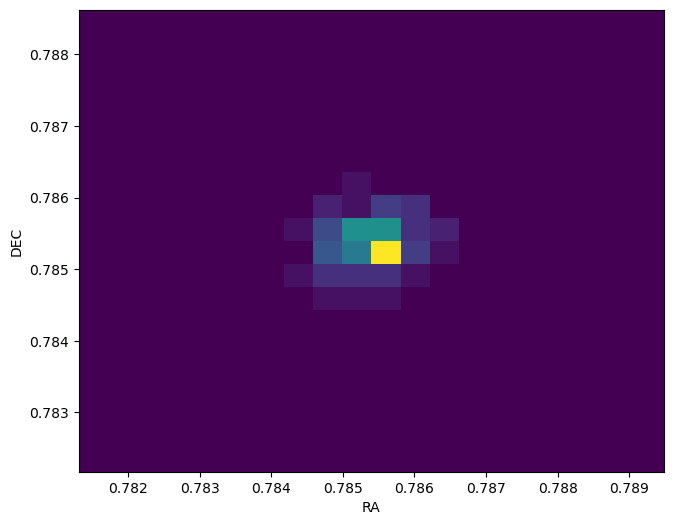

0.00040818055490277224 0.00032271105483799747


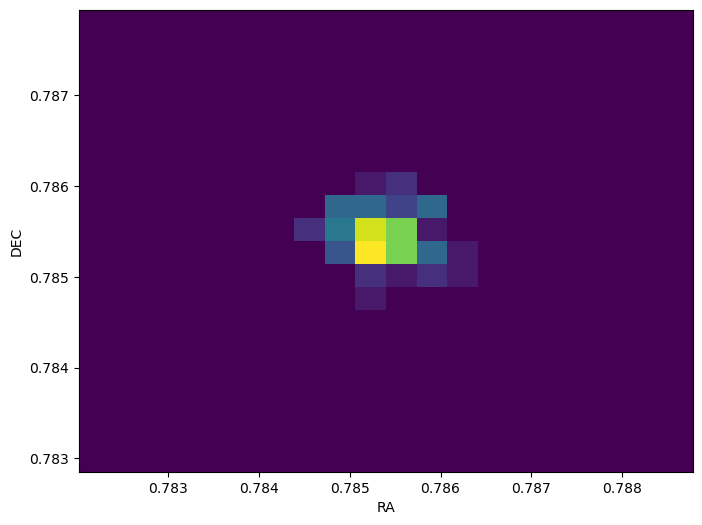

0.00033832339159653923 0.00025471365621806264


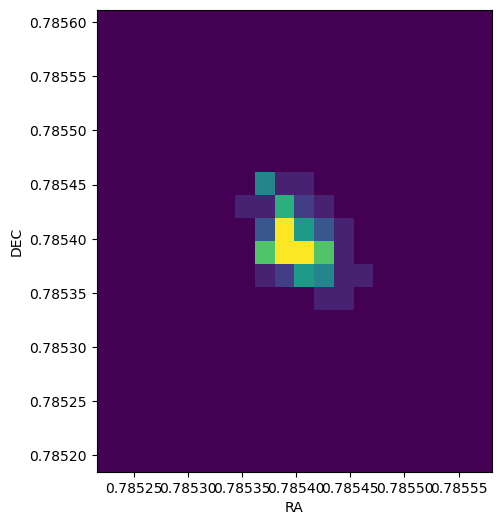

1.8227720039995456e-05 2.133973683618803e-05


In [42]:
df1_prova, df2_prova, df3_prova, =2**-4, 2**-4, 2**-4
f_prova1=np.arange(f_lo1, f_hi, df1_prova)
f_prova2=np.arange(f_lo2, f_hi, df2_prova)
f_prova3=np.arange(f_lo3, f_hi, df3_prova)

t_prova1 = np.linspace(-tc1, 0, 2*int(f_hi1/df1_prova)-1)
t_prova2 = np.linspace(-tc2, 0, 2*int(f_hi1/df2_prova)-1)
t_prova3 = np.linspace(-tc3, 0, 2*int(f_hi1/df3_prova)-1)
net_tdp1 = network.Network(network_spec1)
net_tdp2 = network.Network(network_spec2)
net_tdp3 = network.Network(network_spec3)


net_tdp1.set_wf_vars(wf_model_name='tf2')
net_tdp1.set_net_vars(f=f_prova1, inj_params=inj_params_bbh, deriv_symbs_string=deriv_symbs_string,
                    conv_cos=conv_cos, conv_log=conv_log, use_rot=use_rot)
net_tdp1.calc_wf_polarizations()
net_tdp1.calc_wf_polarizations_derivs_num()
net_tdp1.setup_ant_pat_lpf_psds()
net_tdp1.calc_det_responses()
net_tdp1.calc_det_responses_derivs_num()
net_tdp1.calc_snrs()
net_tdp1.calc_errors(cond_sup=np.inf)
net_tdp1.calc_sky_area_90()
sys.stdout.flush()

net_tdp2.set_wf_vars(wf_model_name='tf2')
net_tdp2.set_net_vars(f=f_prova2, inj_params=inj_params_bbh, deriv_symbs_string=deriv_symbs_string,
                    conv_cos=conv_cos, conv_log=conv_log, use_rot=use_rot)
net_tdp2.calc_wf_polarizations()
net_tdp2.calc_wf_polarizations_derivs_num()
net_tdp2.setup_ant_pat_lpf_psds()
net_tdp2.calc_det_responses()
net_tdp2.calc_det_responses_derivs_num()
net_tdp2.calc_snrs()
net_tdp2.calc_errors(cond_sup=np.inf)
net_tdp2.calc_sky_area_90()
sys.stdout.flush()

net_tdp3.set_wf_vars(wf_model_name='tf2')
net_tdp3.set_net_vars(f=f_prova3, inj_params=inj_params_bbh, deriv_symbs_string=deriv_symbs_string,
                    conv_cos=conv_cos, conv_log=conv_log, use_rot=use_rot)
net_tdp3.calc_wf_polarizations()
net_tdp3.calc_wf_polarizations_derivs_num()
net_tdp3.setup_ant_pat_lpf_psds()
net_tdp3.calc_det_responses()
net_tdp3.calc_det_responses_derivs_num()
net_tdp3.calc_snrs()
net_tdp3.calc_errors(cond_sup=np.inf)
net_tdp3.calc_sky_area_90()
sys.stdout.flush()
ntot=100
grid1=np.random.multivariate_normal([np.pi/4, np.pi/4.0], [[net_tdp1.cov[8,8], net_tdp1.cov[8,9]], [net_tdp1.cov[9,8], net_tdp1.cov[9,9]]], size=(ntot) )
grid2=np.random.multivariate_normal([np.pi/4, np.pi/4.0], [[net_tdp2.cov[8,8], net_tdp2.cov[8,9]], [net_tdp2.cov[9,8], net_tdp2.cov[9,9]]], size=(ntot) )
grid3=np.random.multivariate_normal([np.pi/4, np.pi/4.0], [[net_tdp3.cov[8,8], net_tdp3.cov[8,9]], [net_tdp3.cov[9,8], net_tdp3.cov[9,9]]], size=(ntot) )
#print(big_sample.shape)
ras1, decs1 = grid1[:,0] , grid1[:,1]
ras2, decs2 = grid2[:,0] , grid2[:,1]
ras3, decs3 = grid3[:,0] , grid3[:,1]

ra1=np.sqrt(net_tdp1.cov[8,8])
dec1=np.sqrt(net_tdp1.cov[9,9])

ra2=np.sqrt(net_tdp2.cov[8,8])
dec2=np.sqrt(net_tdp2.cov[9,9])

ra3=np.sqrt(net_tdp3.cov[8,8])
dec3=np.sqrt(net_tdp3.cov[9,9])

#ra=
#dec=

setup_plot((10,6), 'RA', 'DEC')
hist5, xbins5, ybins5 = np.histogram2d(ras1,decs1, bins=20, range=[[np.pi/4-10*ra1, np.pi/4+10*ra1],[np.pi/4-10*dec1, np.pi/4+10*dec1]])
extent=[np.pi/4-10*ra1, np.pi/4+10*ra1,np.pi/4-10*dec1, np.pi/4+10*dec1]
plt.imshow(hist5.T, extent=extent , origin='lower')
plt.savefig(''.join(('histograms/hist_NPSD2_HLVK_s1_' , str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()
print(np.sqrt(net_tdp1.cov[8,8]), np.sqrt(net_tdp1.cov[9,9]))

err_m1=net_tdp1.errs['Mc']
err_eta1=net_tdp1.errs['eta']
err_dl1=net_tdp1.errs['DL']

err_m2=net_tdp2.errs['Mc']
err_eta2=net_tdp2.errs['eta']
err_dl2=net_tdp2.errs['DL']

err_m3=net_tdp3.errs['Mc']
err_eta3=net_tdp3.errs['eta']
err_dl3=net_tdp3.errs['DL']


area1=net_tdp1.errs['sky_area_90']
area2=net_tdp2.errs['sky_area_90']
area3=net_tdp3.errs['sky_area_90']

setup_plot((10,6), 'RA', 'DEC')
hist5, xbins5, ybins5 = np.histogram2d(ras2,decs2, bins=20, range=[[np.pi/4-10*ra2, np.pi/4+10*ra2],[np.pi/4-10*dec2, np.pi/4+10*dec2]])
extent=[np.pi/4-10*ra2, np.pi/4+10*ra2,np.pi/4-10*dec2, np.pi/4+10*dec2]
plt.imshow(hist5.T, extent=extent , origin='lower')
plt.savefig(''.join(('histograms/hist_NPSD2_HLVKI_s1_' , str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()
print(np.sqrt(net_tdp2.cov[8,8]), np.sqrt(net_tdp2.cov[9,9]))
sys.stdout.flush()

setup_plot((10,6), 'RA', 'DEC')
hist5, xbins5, ybins5 = np.histogram2d(ras3,decs3, bins=20, range=[[np.pi/4-10*ra3, np.pi/4+10*ra3],[np.pi/4-10*dec3, np.pi/4+10*dec3]])
extent=[np.pi/4-10*ra3, np.pi/4+10*ra3,np.pi/4-10*dec3, np.pi/4+10*dec3]
plt.imshow(hist5.T, extent=extent , origin='lower')
plt.savefig(''.join(('histograms/hist_NPSD2_ETCE_s1_' , str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()
print(np.sqrt(net_tdp3.cov[8,8]), np.sqrt(net_tdp3.cov[9,9]))
sys.stdout.flush()

grid1, grid2, grid3 = None, None, None
net_tdp1, net_tdp2, net_tdp3= None, None, None 
f_prova1, f_prova2, f_prova3= None, None, None
t_prova1, t_prova2, t_prova3= None, None, None

In [43]:
cos = np.cos
sin = np.sin
exp = np.exp
PI = np.pi


from gwbench.basic_constants import time_fac, REarth, AU, cLight

def rrot_mat(angle,axis):
    c = np.cos(angle)
    s = np.sin(angle)

    if axis == 'i':
        return np.array( ( (1,0,0), (0,c,-s), (0,s,c) ) )
    if axis == 'j':
        return np.array( ( (c,0,s), (0,1,0), (-s,0,c) ) )
    if axis == 'k':
        return np.array( ( (c,-s,0), (s,c,0), (0,0,1) ) )

def ddet_angles(loc):
    # return alpha, beta, gamma in radians
    # alpha ... longitude
    # beta  ... pi/2 - latitude
    # gamma ... angle from 'Due East' to y-arm
    if loc == 'H':
        return -2.08406, PI/2.-0.810795, PI-5.65488
    elif loc == 'L':
        return -1.58431, PI/2.-0.533423, PI-4.40318
    elif loc in ('V','ET1','ET2','ET3'):
        return 0.183338, PI/2.-0.761512, PI-0.33916
    elif loc == 'K':
        return 2.3942, PI/2.-0.632682, PI-1.054113
    elif loc == 'I':
        return 1.334013, PI/2.-0.248418, PI-1.570796

    #elif loc == 'C':
    #    return -1.969174, PI/2.-0.764918, 0.
    #elif loc == 'N':
    #    return -1.8584265, PI/2.-0.578751, -PI/3.
    #elif loc == 'S':
    #    return 2.530727, PI/2.+0.593412, PI/4.
    elif loc == 'C':
        return -1.969174, PI/2.-0.764918, 0.
    elif loc == 'N':
        return -2.1817, PI/2.-0.8029, 3*PI/4.
    elif loc == 'S':
        return -1.64061, PI/2.-0.50615, 0.

def ddet_ten_and_loc_vec(loc, R):
    i_vec = np.array((1,0,0))
    j_vec = np.array((0,1,0))
    k_vec = np.array((0,0,1))

    et_vec2 = ( i_vec + np.sqrt(3.)*j_vec)/2.
    et_vec3 = (-i_vec + np.sqrt(3.)*j_vec)/2.

    alpha, beta, gamma = ddet_angles(loc)
    EulerD1 = np.matmul(np.matmul(rrot_mat(alpha,'k'), rrot_mat(beta,'j')), rrot_mat(gamma,'k'))

    if loc in   ('ET3','LISA3'):
        eDArm1 = -1 * np.matmul(EulerD1,et_vec2)
        eDArm2 = -1 * np.matmul(EulerD1,et_vec3)
    elif loc in ('ET2','LISA2'):
        eDArm1 =      np.matmul(EulerD1,et_vec3)
        eDArm2 = -1 * np.matmul(EulerD1,i_vec)
    elif loc in ('ET1','LISA1'):
        eDArm1 =      np.matmul(EulerD1,i_vec)
        eDArm2 =      np.matmul(EulerD1,et_vec2)
    else:
        eDArm1 = np.matmul(EulerD1,i_vec)
        eDArm2 = np.matmul(EulerD1,j_vec)

    return np.outer(eDArm1,eDArm1) - np.outer(eDArm2,eDArm2), R/cLight * np.matmul(EulerD1,k_vec)

def ap_nontens(ra,dec,fr,Mc,tc,psi,gmst0,loc,use_rot=False):
    half_period = 4.32e4
    R = REarth

    D, d = ddet_ten_and_loc_vec(loc, R)

    if use_rot:
        tf = tc - (5./256.)*(time_fac*Mc)**(-5./3.)*(PI*fr)**(-8./3.)
    else:
        tf = 0

    gra = (gmst0 + tf*PI/half_period) - ra
    theta = PI/2. - dec

    if isinstance(gra, np.ndarray):
        r = np.array((cos(gra) * sin(theta), sin(gra) * sin(theta), cos(theta) * np.ones(len(gra))))
        XX = np.transpose(np.array([ -cos(psi)*sin(gra) - sin(psi)*cos(gra)*sin(dec), -cos(psi)*cos(gra) + sin(psi)*sin(gra)*sin(dec), sin(psi)*cos(dec) * np.ones(len(gra)) ]))
        YY = np.transpose(np.array([  sin(psi)*sin(gra) - cos(psi)*cos(gra)*sin(dec),  sin(psi)*cos(gra) + cos(psi)*sin(gra)*sin(dec), cos(psi)*cos(dec) * np.ones(len(gra)) ]))
        ZZ = np.transpose(np.array([  -cos(gra)*cos(dec) , cos(dec)*sin(gra) , -sin(dec)* np.ones(len(gra))]))
        Fp = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),XX[i]) - np.matmul(np.matmul(YY[i],D),YY[i]) for i in range (len(gra))])
        Fc = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),YY[i]) + np.matmul(np.matmul(YY[i],D),XX[i]) for i in range (len(gra))])
        Fs1 = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),XX[i]) + np.matmul(np.matmul(YY[i],D),YY[i]) for i in range(len(gra))])
        Fs2 = 0.5 * np.array([np.matmul(np.matmul(ZZ[i],D),ZZ[i]) for i in range(len(gra))])
        Fv = 0.5 * np.array([np.matmul(np.matmul(XX[i],D),ZZ[i]) + np.matmul(np.matmul(ZZ[i],D),XX[i]) for i in range(len(gra))])
        Fw = 0.5 * np.array([np.matmul(np.matmul(YY[i],D),ZZ[i]) + np.matmul(np.matmul(ZZ[i],D),YY[i]) for i in range(len(gra))])
    else:
        r = np.array((cos(gra) * sin(theta), sin(gra) * sin(theta), cos(theta)))
        XX = np.transpose(np.array([ -cos(psi)*sin(gra) - sin(psi)*cos(gra)*sin(dec), -cos(psi)*cos(gra) + sin(psi)*sin(gra)*sin(dec), sin(psi)*cos(dec) ]))
        YY = np.transpose(np.array([  sin(psi)*sin(gra) - cos(psi)*cos(gra)*sin(dec),  sin(psi)*cos(gra) + cos(psi)*sin(gra)*sin(dec), cos(psi)*cos(dec) ]))
        ZZ = np.transpose(np.array([  -cos(gra)*cos(dec) , cos(dec)*sin(gra) , -sin(dec)]))
        Fp = 0.5 * (np.matmul(np.matmul(XX,D),XX) - np.matmul(np.matmul(YY,D),YY))
        Fc = 0.5 * (np.matmul(np.matmul(XX,D),YY) + np.matmul(np.matmul(YY,D),XX))
        Fs1 = 0.5 * (np.matmul(np.matmul(XX,D),XX) + np.matmul(np.matmul(YY,D),YY))
        Fs2 = 0.5 * (np.matmul(np.matmul(ZZ,D),ZZ))
        Fv = 0.5 * (np.matmul(np.matmul(XX,D),ZZ) + np.matmul(np.matmul(ZZ,D),XX))
        Fw = 0.5 * (np.matmul(np.matmul(YY,D),ZZ) + np.matmul(np.matmul(ZZ,D),YY))
        
    return np.array([exp(1j * 2*PI * fr * np.matmul(d,r)) , Fp, Fc,  Fs2 , Fv , Fw])

def calc_ap(nett, ra, dec, freq,freq_max, Mc, tc, psi, gmst0, use_rot):
    df = freq[1]-freq[0]
    #print(df)
    #print(freq_max)
    if freq_max.all != None:
        net_aps=[[np.zeros_like(freq_max, dtype=np.cfloat)]*5]*len(nett.detectors)
        
        net_aps=np.cfloat(net_aps)
        #print(net_aps.shape)
        for det in nett.detectors:
            loc=det.loc
            #print(ap_nontens(ra,dec,freq,Mc,tc,psi,gmst0,loc,use_rot).shape)
            #print(nett.detectors.index(det))
            #print(len(freq), len(ap_nontens(ra,dec,freq,Mc,tc,psi,gmst0,loc,use_rot)[1]))
            #print(ap_nontens(ra,dec,freq,Mc,tc,psi,gmst0,loc,use_rot)[1:5][:])
            #print(loc)
            #print(int((freq[0]-freq_max[0])/df), int((abs(freq_max[-1]-freq[-1]))/df))
            #print(ap_nontens(ra,dec,freq,Mc,tc,psi,gmst0,loc,use_rot)[1][:])
            #print(net_aps[nett.detectors.index(det),0:4, int((freq[0]-freq_max[0])/df):int((abs(freq_max[0]-freq[0])/df))+
                                                    #len(freq)])
            #print(ap_nontens(ra,dec,freq,Mc,tc,psi,gmst0,loc,use_rot)[1:5,:])
            #print(net_aps[nett.detectors.index(det),0:4, int((freq[0]-freq_max[0])/df):int((abs(freq_max[0]-freq[0])/df))+
             #                                       len(freq)].shape)
            net_aps[nett.detectors.index(det),0:5, int((freq[0]-freq_max[0])/df):int((abs(freq_max[0]-freq[0])/df))+
                                                    len(freq)] = ap_nontens(ra,dec,freq,Mc,tc,psi,gmst0,loc,use_rot)[1:6,:]
            #print(net_aps[nett.detectors.index(det),0:4, int((freq[0]-freq_max[0])/df):int((abs(freq_max[0]-freq[0])/df))+
                                                    #len(freq)])
            
            #print(net_aps[nett.detectors.index(det)][1][int((freq[0]-freq_max[0])/df):int((abs(freq_max[0]-freq[0])/df))+
                                                    #len(freq)])
            #print(np.nonzero(net_aps[nett.detectors.index(det),2,:]))
            net_aps[nett.detectors.index(det)] = np.array(net_aps[nett.detectors.index(det)], dtype=object)

    else:
        '''
        
        THIS NEEDS DEBUGGING!!!
        
        
        '''
        net_aps=[[np.zeros_like(freq)]*5]*len(nett.detectors)
        for det in nett.detectors:
            #print(det)
            loc=det.loc
            net_aps[nett.detectors.index(det)][0:5][:] = ap_nontens(ra,dec,freq,Mc,tc,psi,gmst0,loc,use_rot)[1:6][:]
            #print(np.nonzero(net_aps[nett.detectors.index(det)][0]).shape)
            net_aps[nett.detectors.index(det)] = np.array(net_aps[nett.detectors.index(det)], dtype=object)
            
    net_aps = np.array(net_aps, dtype=object)
    net_aps[nett.detectors.index(det),:]= np.array(net_aps[nett.detectors.index(det),:], dtype=object)
    return net_aps


#Fnet= calc_ap(net1, np.pi/4, np.pi/4, f1, fre1_td1,  35, 0, np.pi/4, 0, True)
#Fnet1= calc_ap(net1, np.pi/4, np.pi/4, f1,  35, 0, np.pi/4, 0, True)
#Fnet3= calc_ap(net3, np.pi/4, np.pi/4, f,  35, 0, np.pi/4, 0, True)
#print(Fnet.shape)
#print(np.nonzero(Fnet[1,2,:]))
#print(fre1_td1[320], f1[0])
#
#print('ciao')
#rint(Fnet)
#print(Fnet1.shape) 
#print(Fnet3.shape)

In [44]:
s1, s2, s3 = [], [], []
v1, v2, v3 = [], [], []
w1, w2, w3 = [], [], []
n3d1, n3d2, n3d3 = [], [], []
'''
irfft_bbh=[]
null_1_total_fft_bbh=[]
null_1_total_bbh=[]
s1_bbh=[]
s5_bbh=[]
irfft_bns=[]
null_1_total_fft_bns=[]
null_1_total_bns=[]
s1_bns=[]
s5_bns=[]
'''

net_td1 = network.Network(network_spec1)
net_td2 = network.Network(network_spec2)
net_td3 = network.Network(network_spec3)
#wf_model_name_bns = 'tf2_tidal'
wf_model_name = 'tf2'
net_td1.set_wf_vars(wf_model_name=wf_model_name)
net_td2.set_wf_vars(wf_model_name=wf_model_name)
net_td3.set_wf_vars(wf_model_name=wf_model_name)


eta=etazonz



#print(tc)
#null1=np.zeros((ntot,len(fre1_td1)), dtype=np.cfloat)
#null2=np.zeros((ntot,len(fre1_td2)), dtype=np.cfloat)
#null3=np.zeros((ntot,len(fre1_td3)), dtype=np.cfloat)

#print(distanza_l)
#print(httdbns)
#print(len(ffffbns[0]), f_hi1, f_hi_bns, df_bns, len(null_2_fft_bns[0]))
#for j in range (0, ntot):
def megaf(conteggio):
    p=1
    global null1
    global null2
    global null3
    global ffff1
    global ffff2
    global ffff3
    #global ras1, decs1, ras2, decs2, ras3, decs3
    print(conteggio)
    sys.stdout.flush()
    use_rot = True

    inj_params_td1                   = dict()

    inj_params_td1['Mc']              = Mc_bbh
    inj_params_td1['eta']             = eta
    inj_params_td1['chi1z']           = 0.0
    inj_params_td1['chi2z']           = 0.0
    inj_params_td1['DL']              = distanza_l
    inj_params_td1['tc']              = 0.0
    inj_params_td1['phic']            = 0.0
    inj_params_td1['iota']            = np.pi/4
    inj_params_td1['ra']              = ras1[conteggio]
    inj_params_td1['dec']             = decs1[conteggio]
    inj_params_td1['psi']             = np.pi/4
    inj_params_td1['gmst0']           = 0.0

    inj_params_td3                    = dict()

    inj_params_td3['Mc']              = Mc_bbh
    inj_params_td3['eta']             = eta
    inj_params_td3['chi1z']           = 0.0
    inj_params_td3['chi2z']           = 0.0
    inj_params_td3['DL']              = distanza_l
    inj_params_td3['tc']              = 0.0
    inj_params_td3['phic']            = 0.0
    inj_params_td3['iota']            = np.pi/4
    inj_params_td3['ra']              = ras3[conteggio]
    inj_params_td3['dec']             = decs3[conteggio]
    inj_params_td3['psi']             = np.pi/4
    inj_params_td3['gmst0']           = 0.0

    inj_params_td2                   = dict()

    inj_params_td2['Mc']              = Mc_bbh
    inj_params_td2['eta']             = eta
    inj_params_td2['chi1z']           = 0.0
    inj_params_td2['chi2z']           = 0.0
    inj_params_td2['DL']              = distanza_l
    inj_params_td2['tc']              = 0.0
    inj_params_td2['phic']            = 0.0
    inj_params_td2['iota']            = np.pi/4
    inj_params_td2['ra']              = ras2[conteggio]
    inj_params_td2['dec']             = decs2[conteggio]
    inj_params_td2['psi']             = np.pi/4
    inj_params_td2['gmst0']           = 0.0

    #Mtot_td=br.M_of_Mc_eta(inj_params_td1['Mc'],inj_params_td1['eta'])
    #print(len(f2), len(f_td))
    #f_lo=5.




    '''
    data1=list(np.zeros((4,)))
    data2=list(np.zeros((5,)))
    data3=list(np.zeros((5,)))
    '''
    

    deriv_symbs_string = 'Mc eta DL tc phic iota ra dec psi'
    conv_cos = ('')
    conv_log = ('')

    '''
    net_td1.set_net_vars(
        f=f1, inj_params=inj_params_td1,
        deriv_symbs_string=deriv_symbs_string,
        conv_cos=conv_cos, conv_log=conv_log,
        use_rot=use_rot
        )
    #net.calc_wf_polarizations()
    #net.calc_wf_polarizations_derivs_num()
    net_td1.setup_ant_pat_lpf_psds()
    #net_td1.calc_det_responses()
    #net.calc_det_responses_derivs_num()
    #net.calc_snrs()
    #net.calc_errors()
    #net.calc_sky_area_90()

    net_td2.set_net_vars(
        f=f2, inj_params=inj_params_td2,
        deriv_symbs_string=deriv_symbs_string,
        conv_cos=conv_cos, conv_log=conv_log,
        use_rot=use_rot
        )
    #net.calc_wf_polarizations()
    #net.calc_wf_polarizations_derivs_num()
    net_td3.setup_ant_pat_lpf_psds()
    
    net_td3.set_net_vars(
        f=f3, inj_params=inj_params_td2,
        deriv_symbs_string=deriv_symbs_string,
        conv_cos=conv_cos, conv_log=conv_log,
        use_rot=use_rot
        )
    #net.calc_wf_polarizations()
    #net.calc_wf_polarizations_derivs_num()
    net_td3.setup_ant_pat_lpf_psds()
    '''
    fre1= np.pad(f1, (int(f_lo1/df1), int((f_hi1-f_hi)/df1)))
    #print(len(f1), len(fre1))
    fre2= np.pad(f2, (int(f_lo2/df2), int((f_hi1-f_hi)/df2)))
    fre3= np.pad(f3, (int(f_lo3/df3), int((f_hi1-f_hi)/df3)))
    #print(len(f2), len(fre2))
    #print(len(f3), len(fre3))
    '''
    data1=[np.zeros_like(fre1)]*4
    data2=[np.zeros_like(fre2)]*5
    data3=[np.zeros_like(fre3)]*5

    p1=np.array([np.zeros_like(fre1)]*4)
    c1=np.array([np.zeros_like(fre1)]*4)
    p2=np.array([np.zeros_like(fre2)]*5)
    c2=np.array([np.zeros_like(fre2)]*5)
    p3=np.array([np.zeros_like(fre3)]*5)
    c3=np.array([np.zeros_like(fre3)]*5)
    
    for dec in net_td1.detectors:
        for det in dets_try1:

            if '_'.join((str(dec.tec), str(dec.loc)))==str(det):
                p1[int(dets_try1[det]),int((f1[0]-fre1[0])/df1):int((abs(fre1[0]-f1[0])/df1))+
                                                    len(f1)]=dec.Fp
                c1[int(dets_try1[det]),int((f1[0]-fre1[0])/df1):int((abs(fre1[0]-f1[0])/df1))+
                                                    len(f1)]=dec.Fc
    for dec in net_td2.detectors:
        for det in dets_try2:

            if '_'.join((str(dec.tec), str(dec.loc)))==str(det):
                p2[int(dets_try2[det]),int((f1[0]-fre1[0])/df1):int((abs(fre1[0]-f1[0])/df1))+
                                                    len(f1)]=dec.Fp
                c2[int(dets_try2[det]),int((f2[0]-fre2[0])/df2):int((abs(fre2[0]-f1[0])/df1))+
                                                    len(f2)]=dec.Fc

    for dec in net_td3.detectors:
        for det in dets_try3:

            if '_'.join((str(dec.tec), str(dec.loc)))==str(det):
                p3[int(dets_try3[det]),int((f3[0]-fre3[0])/df3):int((abs(fre3[0]-f3[0])/df3))+
                                                    len(f3)]=dec.Fp
                c3[int(dets_try3[det]),int((f3[0]-fre3[0])/df3):int((abs(fre3[0]-f3[0])/df3))+
                                                    len(f3)]=dec.Fc
    
    signal_f_bbh=[0.0]*4
    signal_fft_bbh=[0.0]*4
    pt_fft_bbh=[0.0]*4
    ct_fft_bbh=[0.0]*4
    tt_bbh=[0.0]*4
    ht_bbh=[0.0]*4
    pt_bbh=[0.0]*4
    ct_bbh=[0.0]*4

    signal_f_bns=[0.0]*4
    signal_fft_bns=[0.0]*4
    pt_fft_bns=[0.0]*4
    ct_fft_bns=[0.0]*4
    tt_bns=[0.0]*4
    ht_bns=[0.0]*4
    pt_bns=[0.0]*4
    ct_bns=[0.0]*4

    p_ohr_bbh=[0.0]*4
    c_ohr_bbh=[0.0]*4
    p_ohr_bns=[0.0]*4
    c_ohr_bns=[0.0]*4

    v_ohr_bbh=[0.0]*4
    w_ohr_bbh=[0.0]*4
    v_ohr_bns=[0.0]*4
    w_ohr_bns=[0.0]*4

    b_ohr_bbh=[0.0]*4
    l_ohr_bbh=[0.0]*4
    b_ohr_bns=[0.0]*4
    l_ohr_bns=[0.0]*4

    '''
    pf1=np.array(np.cfloat([np.zeros_like(fre1)]*4), dtype=object)
    pf2=np.array(np.cfloat([np.zeros_like(fre2)]*5), dtype=object)
    pf3=np.array(np.cfloat([np.zeros_like(fre3)]*5), dtype=object)
    cf1=np.array(np.cfloat([np.zeros_like(fre1)]*4), dtype=object)
    cf2=np.array(np.cfloat([np.zeros_like(fre2)]*5), dtype=object)
    cf3=np.array(np.cfloat([np.zeros_like(fre3)]*5), dtype=object)
    vf1=np.array(np.cfloat([np.zeros_like(fre1)]*4), dtype=object)
    vf2=np.array(np.cfloat([np.zeros_like(fre2)]*5), dtype=object)
    vf3=np.array(np.cfloat([np.zeros_like(fre3)]*5), dtype=object)
    wf1=np.array(np.cfloat([np.zeros_like(fre1)]*4), dtype=object)
    wf2=np.array(np.cfloat([np.zeros_like(fre2)]*5), dtype=object)
    wf3=np.array(np.cfloat([np.zeros_like(fre3)]*5), dtype=object)
    bf1=np.array(np.cfloat([np.zeros_like(fre1)]*4), dtype=object)
    bf2=np.array(np.cfloat([np.zeros_like(fre2)]*5), dtype=object)
    bf3=np.array(np.cfloat([np.zeros_like(fre3)]*5), dtype=object)
    lf1=np.array(np.cfloat([np.zeros_like(fre1)]*4), dtype=object)
    lf2=np.array(np.cfloat([np.zeros_like(fre2)]*5), dtype=object)
    lf3=np.array(np.cfloat([np.zeros_like(fre3)]*5), dtype=object)
    
    Fnet1= calc_ap(net_td1, ras1[conteggio], decs1[conteggio], f1, fre1, 35, 0, np.pi/4, 0, True)
    Fnet2= calc_ap(net_td2, ras2[conteggio], decs2[conteggio], f2, fre2, 35, 0, np.pi/4, 0, True)
    Fnet3= calc_ap(net_td3, ras3[conteggio], decs3[conteggio], f3, fre3, 35, 0, np.pi/4, 0, True)

    
    for i in range (0, 5):

        loc2=str(network_spec2[i]).split('_')
        loc2=loc2[1]
        #p_ohr_bbh[i], c_ohr_bbh[i], v_ohr_bbh[i], w_ohr_bbh[i], l_ohr_bbh[i], b_ohr_bbh[i]=apkons(inj_params_td1_bbh['ra'],inj_params_td1_bbh['dec'],t2_bbh,inj_params_td1_bbh['Mc'],inj_params_td1_bbh['tc'],inj_params_td1_bbh['psi'],inj_params_td1_bbh['gmst0'],loc,use_rot, time=True)
        #p_ohr_bns[i], c_ohr_bns[i], v_ohr_bns[i], w_ohr_bns[i], l_ohr_bns[i], b_ohr_bns[i]=apkons(inj_params_td1_bns['ra'],inj_params_td1_bns['dec'],t2_bns,inj_params_td1_bns['Mc'],inj_params_td1_bns['tc'],inj_params_td1_bns['psi'],inj_params_td1_bns['gmst0'],loc,use_rot, time=True)
        if i < 4:
            pf1[i], cf1[i], vf1[i], wf1[i], bf1[i]= Fnet1[i,0], Fnet1[i,1], Fnet1[i,3], Fnet1[i,4], Fnet1[i,2]
        pf2[i], cf2[i], vf2[i], wf2[i], bf2[i]= Fnet2[i,0], Fnet2[i,1], Fnet2[i,3], Fnet2[i,4], Fnet2[i,2]
        pf3[i], cf3[i], vf3[i], wf3[i], bf3[i]= Fnet3[i,0], Fnet3[i,1], Fnet3[i,3], Fnet3[i,4], Fnet3[i,2]
        #print(len(pf1[i]), len(pf2[i]), len(pf3[i]))
        #print(i)
        #signal_fft_bbh[i]=np.pad(data_bbh[i], (int(f_lo/df_bbh), int((f_hi1-f_hi_bbh)/df_bbh)))
        #signal_fft_bns[i]=np.pad(data_bns[i], (int(f_lo/df_bns), int((f_hi1-f_hi_bns)/df_bns)))
        '''
        if use_rot:
            pt_fft_bbh[i]=np.pad(p_bbh[i],(int(f_lo/df_bbh),int((f_hi1-f_hi_bbh)/df_bbh)))
            ct_fft_bbh[i]=np.pad(c_bbh[i],(int(f_lo/df_bbh),int((f_hi1-f_hi_bbh)/df_bbh)))
            pt_bbh[i]=np.fft.irfft(pt_fft_bbh[i], n=2*int(f_hi1/df_bbh)-1)*df_bbh
            ct_bbh[i]=np.fft.irfft(ct_fft_bbh[i], n=2*int(f_hi1/df_bbh)-1)*df_bbh

            pt_fft_bns[i]=np.pad(p_bns[i],(int(f_lo/df_bns),int((f_hi1-f_hi_bns)/df_bns)))
            ct_fft_bns[i]=np.pad(c_bns[i],(int(f_lo/df_bns),int((f_hi1-f_hi_bns)/df_bns)))
            pt_bns[i]=np.fft.irfft(pt_fft_bns[i], n=2*int(f_hi1/df_bns)-1)*df_bns
            ct_bns[i]=np.fft.irfft(ct_fft_bns[i], n=2*int(f_hi1/df_bns)-1)*df_bns
        else:
            pt_fft_bbh[i]=p_bbh[i]
            ct_fft_bbh[i]=c_bbh[i]
            pt_bbh[i]=pt_fft_bbh[i]
            ct_bbh[i]=ct_fft_bbh[i]

            pt_fft_bns[i]=p_bns[i]
            ct_fft_bns[i]=c_bns[i]
            pt_bns[i]=pt_fft_bns[i]
            ct_bns[i]=ct_fft_bns[i]
        '''
        
    
    #null1=np.zeros_like(fre1_td1, dtype=complex)
    #null2=np.zeros_like(fre1_td2, dtype=complex)
    #null3=np.zeros_like(fre1_td3, dtype=complex)
    

    #ffffbns=np.array(ffffbns)
    #ffffbns[:]=np.array(ffffbns[:])
    #ffffbbh=np.array(ffffbbh)
    #ffffbbh[:]=np.array(ffffbbh[:])
    #print(len( null_2_fft_bns[j,:]), len(pt_fft_bns[2,:]), len(ffffbns[1,:]), 'lenghts')
    null1=np.zeros((len(fre1_td1)), dtype=np.cfloat)
    null2=np.zeros((len(fre1_td2)), dtype=np.cfloat)
    null3=np.zeros((len(fre1_td3)), dtype=np.cfloat)
    if use_rot:
        
        null1[:]=(pf1[2,:]*cf1[3,:] - pf1[3,:]*cf1[2,:])*ffff1[1,:] + (pf1[3,:]*cf1[1,:] 
            - pf1[1,:]*cf1[3,:])*ffff1[2,:] + (pf1[1,:]*cf1[2,:] - pf1[2,:]*cf1[1,:])*ffff1[3,:]
        
        null2[:]=(pf2[3,:]*cf2[4,:] - pf2[4,:]*cf2[3,:])*ffff2[2,:] + (pf2[4,:]*cf2[2,:] 
            - pf2[2,:]*cf2[4,:])*ffff2[3,:] + (pf2[2,:]*cf2[3,:] - pf2[3,:]*cf2[2,:])*ffff2[4,:]
        
        null3[:]=(pf3[2,:]*cf3[3,:] - pf3[3,:]*cf3[2,:])*ffff3[1,:] + (pf3[3,:]*cf3[1,:] 
            - pf3[1,:]*cf3[3,:])*ffff3[2,:] + (pf3[1,:]*cf3[2,:] - pf3[2,:]*cf3[1,:])*ffff3[3,:]
    
    
    
    S1=null1*np.conjugate(null1)#*df_bbh*2
    null1=None
    S2=null2*np.conjugate(null2)#*df_bbh*2
    null2=None
    S3=null3*np.conjugate(null3)#*df_bbh*2
    null3=None
    '''
    #(frequencies5, S15bbh) = scipy.signal.periodogram(null_1_bbh, 1/deltaT, scaling='density')
    S15bbhf=np.fft.rfft(null_1_bbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    S15bbh=S15bbhf*np.conjugate(S15bbhf)#*df_bbh*2
    #(frequencies6, S16bbh) = scipy.signal.periodogram(null_2_bbh, 1/deltaT, scaling='density')
    S16bbhf=np.fft.rfft(null_2_bbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    S16bbh=S16bbhf*np.conjugate(S16bbhf)#*df_bbh*2
    #(frequencies7, S17bbh) = scipy.signal.periodogram(null_3_bbh, 1/deltaT, scaling='density')
    S17bbhf=np.fft.rfft(null_3_bbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    S17bbh=S17bbhf*np.conjugate(S17bbhf)#*df_bbh*2
    #(frequencies8, S18bbh) = scipy.signal.periodogram(null_4_bbh, 1/deltaT, scaling='density')
    S18bbhf=np.fft.rfft(null_4_bbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    S18bbh=S18bbhf*np.conjugate(S18bbhf)#*df_bbh*2
    #(frequencies9, S19bbh) = scipy.signal.periodogram(null_5_bbh, 1/deltaT, scaling='density')
    S19bbhf=np.fft.rfft(null_5_bbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    S19bbh=S19bbhf*np.conjugate(S19bbhf)#*df_bbh*2
    #irfftbbh.append(null2_irfft_bbh)
    #s99_bbh.append(S10bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #s100_bbh.append(S11bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])


    

    S10bnsf=np.fft.rfft(null_21_bns[conteggio].real)*deltaT*(2*int(f_hi1/df_bns)-1)
    S10bns=S10bnsf*np.conjugate(S10bnsf)#*df_bns*2
    #(frequencies11, S11bbh) = scipy.signal.periodogram(null2_irfft_bbh, 1/deltaT, scaling='density')
    S11bnsf=null_2_fft_bns[conteggio,:]
    S11bns=S11bnsf*np.conjugate(S11bnsf)#*df_bns*2
    #(frequencies5, S15bbh) = scipy.signal.periodogram(null_1_bbh, 1/deltaT, scaling='density')
    S15bnsf=np.fft.rfft(null_1_bns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    S15bns=S15bnsf*np.conjugate(S15bnsf)#*df_bns*2
    #(frequencies6, S16bbh) = scipy.signal.periodogram(null_2_bbh, 1/deltaT, scaling='density')
    S16bnsf=np.fft.rfft(null_2_bns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    S16bns=S16bnsf*np.conjugate(S16bnsf)#*df_bns*2
    #(frequencies7, S17bbh) = scipy.signal.periodogram(null_3_bbh, 1/deltaT, scaling='density')
    S17bnsf=np.fft.rfft(null_3_bns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    S17bns=S17bnsf*np.conjugate(S17bnsf)#*df_bns*2
    #(frequencies8, S18bbh) = scipy.signal.periodogram(null_4_bbh, 1/deltaT, scaling='density')
    S18bnsf=np.fft.rfft(null_4_bns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    S18bns=S18bnsf*np.conjugate(S18bnsf)#*df_bns*2
    #(frequencies9, S19bbh) = scipy.signal.periodogram(null_5_bbh, 1/deltaT, scaling='density')
    S19bnsf=np.fft.rfft(null_5_bns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    S19bns=S19bnsf*np.conjugate(S19bnsf)#*df_bns*2
    #irfftbbh.append(null2_irfft_bbh)
    #s99_bns.append(S10bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #s100_bns.append(S11bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    '''
    
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVK_', 
                     str(inj_params_td1['eta']),'_' , '3S1_', str(conteggio))), S1[int(f_lo1/df1):int(f_hi/df1)+1].real)
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVKI_',
                     str(inj_params_td1['eta']),'_' , '3S2_', str(conteggio))), S2[int(f_lo2/df2):int(f_hi/df2)+1].real)
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_ETCE_',
                     str(inj_params_td1['eta']),'_' , '3S3_', str(conteggio))), S3[int(f_lo3/df3):int(f_hi/df3)+1].real)
    #print(S3[int(f_lo3/df3):int(f_hi/df3)+1])
    '''
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 's100_bbh', str(conteggio))), S11bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 's1_bns', str(conteggio))), S15bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 's2_bns', str(conteggio))), S16bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 's3_bns', str(conteggio))), S17bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 's4_bns', str(conteggio))), S18bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 's5_bns', str(conteggio))), S19bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 's1_bbh', str(conteggio))), S15bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 's2_bbh', str(conteggio))), S16bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 's3_bbh', str(conteggio))), S17bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 's4_bbh', str(conteggio))), S18bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 's5_bbh', str(conteggio))), S19bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    '''

    #s1_bbh.append(S15bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #s2_bbh.append(S16bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #s3_bbh.append(S17bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #s4_bbh.append(S18bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #s5_bbh.append(S19bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #s1_bns.append(S15bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #s2_bns.append(S16bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #s3_bns.append(S17bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #s4_bns.append(S18bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #s5_bns.append(S19bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])



    if use_rot:
        '''
        v_ohr_bbh=np.array(v_ohr_bbh)
        w_ohr_bbh=np.array(w_ohr_bbh)
        c_ohr_bbh=np.array(c_ohr_bbh)
        p_ohr_bbh=np.array(p_ohr_bbh)
        l_ohr_bbh=np.array(l_ohr_bbh)
        b_ohr_bbh=np.array(b_ohr_bbh)
        v_ohr_bns=np.array(v_ohr_bns)
        w_ohr_bns=np.array(w_ohr_bns)
        c_ohr_bns=np.array(c_ohr_bns)
        p_ohr_bns=np.array(p_ohr_bns)
        l_ohr_bns=np.array(l_ohr_bns)
        b_ohr_bns=np.array(b_ohr_bns)

        v_ohr_bbh[:]=np.array(v_ohr_bbh[:])
        w_ohr_bbh[:]=np.array(w_ohr_bbh[:])
        c_ohr_bbh[:]=np.array(c_ohr_bbh[:])
        p_ohr_bbh[:]=np.array(p_ohr_bbh[:])
        l_ohr_bbh[:]=np.array(l_ohr_bbh[:])
        b_ohr_bbh[:]=np.array(b_ohr_bbh[:])
        v_ohr_bns[:]=np.array(v_ohr_bns[:])
        w_ohr_bns[:]=np.array(w_ohr_bns[:])
        c_ohr_bns[:]=np.array(c_ohr_bns[:])
        p_ohr_bns[:]=np.array(p_ohr_bns[:])
        l_ohr_bns[:]=np.array(c_ohr_bns[:])
        b_ohr_bns[:]=np.array(b_ohr_bns[:])

        vfbbh=np.array(vfbbh)
        wfbbh=np.array(wfbbh)
        cfbbh=np.array(cfbbh)
        pfbbh=np.array(pfbbh)
        lfbbh=np.array(lfbbh)
        bfbbh=np.array(bfbbh)
        vfbns=np.array(vfbns)
        wfbns=np.array(wfbns)
        cfbns=np.array(cfbns)
        pfbns=np.array(pfbns)
        lfbns=np.array(lfbns)
        bfbns=np.array(bfbns)

        vfbbh[:]=np.array(vfbbh[:])
        wfbbh[:]=np.array(wfbbh[:])
        cfbbh[:]=np.array(cfbbh[:])
        pfbbh[:]=np.array(pfbbh[:])
        lfbbh[:]=np.array(lfbbh[:])
        bfbbh[:]=np.array(bfbbh[:])
        vfbns[:]=np.array(vfbns[:])
        wfbns[:]=np.array(wfbns[:])
        cfbns[:]=np.array(cfbns[:])
        pfbns[:]=np.array(pfbns[:])
        lfbns[:]=np.array(lfbns[:])
        bfbns[:]=np.array(bfbns[:])

        vbbh=np.array(v_ohr_bbh)
        wbbh=np.array(w_ohr_bbh)
        cbbh=np.array(c_ohr_bbh)
        pbbh=np.array(p_ohr_bbh)
        lbbh=np.array(l_ohr_bbh)
        bbbh=np.array(b_ohr_bbh)
        vbns=np.array(v_ohr_bns)
        wbns=np.array(w_ohr_bns)
        cbns=np.array(c_ohr_bns)
        pbns=np.array(p_ohr_bns)
        lbns=np.array(l_ohr_bns)
        bbns=np.array(b_ohr_bns)
        '''
    
        d1=np.zeros((3, len(fre1), 4, 4), dtype=np.cfloat)
        d2=np.zeros((3, len(fre2), 4, 4), dtype=np.cfloat)
        d3=np.zeros((3, len(fre3), 4, 4), dtype=np.cfloat)
        
        for j in range (0,4):
            sa1=np.transpose(np.array([ffff1[j,], bf1[j,], pf1[j,], cf1[j,]]))
            va1=np.transpose(np.array([ffff1[j,], vf1[j,], pf1[j,], cf1[j,]]))
            wa1=np.transpose(np.array([ffff1[j,], wf1[j,], pf1[j,], cf1[j,]]))
            
            
            sa2=np.transpose(np.array([ffff2[j+1,], bf2[j+1,], pf2[j+1,], cf2[j+1,]]))
            va2=np.transpose(np.array([ffff2[j+1,], vf2[j+1,], pf2[j+1,], cf2[j+1,]]))
            wa2=np.transpose(np.array([ffff2[j+1,], wf2[j+1,], pf2[j+1,], cf2[j+1,]]))

            sa3=np.transpose(np.array([ffff3[j+1,], bf3[j+1,], pf3[j+1,], cf3[j+1,]]))
            va3=np.transpose(np.array([ffff3[j+1,], vf3[j+1,], pf3[j+1,], cf3[j+1,]]))
            wa3=np.transpose(np.array([ffff3[j+1,], wf3[j+1,], pf3[j+1,], cf3[j+1,]]))
            d1[0,:,j,:] = sa1[:,:]
            d2[0,:,j,:] = sa2[:,:]
            d3[0,:,j,:] = sa3[:,:]
            d1[1,:,j,:] = va1[:,:]
            d2[1,:,j,:] = va2[:,:]
            d3[1,:,j,:] = va3[:,:]
            d1[2,:,j,:] = wa1[:,:]
            d2[2,:,j,:] = wa2[:,:]
            d3[2,:,j,:] = wa3[:,:]
        ffff1, ffff2, ffff3 = None, None, None
        pf1, pf2, pf3 = None, None, None
        cf1, cf2, cf3 = None, None, None
        vf1, vf2, vf3 = None, None, None
        wf1, wf2, wf3 = None, None, None
        bf1, bf2, bf3 = None, None, None
        #prova=np.zeros_like(fre1)
        det1=np.linalg.det(d1)
        d1=None
        det2=np.linalg.det(d2)
        d2=None
        det3=np.linalg.det(d3)
        d3=None
        '''
        for i in range(0, det1.shape[0]):
            print(i)
            print(np.nonzero(det1[i,:]))
            print(np.nonzero(det2[i,:]))
            print(np.nonzero(det3[i,:]))
        #d1[0,:]=np.matrix([[ffff1[1,:], bf1[1,:], pf1[1,:], cf1[1,:]],[ffff1[2,:], bf1[2,:], pf1[2,:], cf1[2,:]],
        #                 [ffff1[3,:], bf1[3,:], pf1[3,:], cf1[3,:]],[ffff1[0,:], bf1[0,:], pf1[0,:], cf1[0,:]]])
        d1[1,:]=np.matrix([ffff1[1,:], vf1[1,:], pf1[1,:], cf1[1,:]],[ffff1[2,:], vf1[2,:], pf1[2,:], cf1[2,:]],
                         [ffff1[3,:], vf1[3,:], pf1[3,:], cf1[3,:]],[ffff1[0,:], vf1[0,:], pf1[0,:], cf1[0,:]])
        d1[2,:]=np.matrix([ffff1[1,:], wf1[1,:], pf1[1,:], cf1[1,:]],[ffff1[2,:], wf1[2,:], pf1[2,:], cf1[2,:]],
                         [ffff1[3,:], wf1[3,:], pf1[3,:], cf1[3,:]],[ffff1[0,:], wf1[0,:], pf1[0,:], cf1[0,:]])
        
        #d7=np.zeros((3,len(fre1)), dtype=object)
        #d8=np.zeros((3,len(fre1)), dtype=object)
        #d9=np.zeros((3,len(fre1)), dtype=object)

        
        d2[0,:]=np.matrix([ffff2[1,:], bf2[1,:], pf2[1,:], cf2[1,:]],[ffff2[2,:], bf2[2,:], pf2[2,:], cf2[2,:]],
                         [ffff2[3,:], bf2[3,:], pf2[3,:], cf2[3,:]],[ffff2[4,:], bf2[4,:], pf2[4,:], cf2[4,:]])
        d2[1,:]=np.matrix([ffff2[1,:], vf2[1,:], pf2[1,:], cf2[1,:]],[ffff2[2,:], vf2[2,:], pf2[2,:], cf2[2,:]],
                         [ffff2[3,:], vf2[3,:], pf2[3,:], cf2[3,:]],[ffff2[4,:], vf2[4,:], pf2[4,:], cf2[4,:]])
        d2[2,:]=np.matrix([ffff2[1,:], wf2[1,:], pf2[1,:], cf2[1,:]],[ffff2[2,:], wf2[2,:], pf2[2,:], cf2[2,:]],
                         [ffff2[3,:], wf2[3,:], pf2[3,:], cf2[3,:]],[ffff2[4,:], wf2[4,:], pf2[4,:], cf2[4,:]])
        
        #d10=np.zeros((3,len(fre1)), dtype=object)
        #d11=np.zeros((3,len(fre1)), dtype=object)
        #d12=np.zeros((3,len(fre1)), dtype=object)

        
        d3[0,:]=np.matrix([ffff3[1,:], bf3[1,:], pf3[1,:], cf3[1,:]],[ffff3[2,:], bf3[2,:], pf3[2,:], cf3[2,:]],
                         [ffff3[3,:], bf3[3,:], pf3[3,:], cf3[3,:]],[ffff3[4,:], bf3[4,:], pf3[4,:], cf3[4,:]])
        d3[1,:]=np.matrix([ffff3[1,:], vf3[1,:], pf3[1,:], cf3[1,:]],[ffff3[2,:], vf3[2,:], pf3[2,:], cf3[2,:]],
                         [ffff3[3,:], vf3[3,:], pf3[3,:], cf3[3,:]],[ffff3[4,:], vf3[4,:], pf3[4,:], cf3[4,:]])
        d3[2,:]=np.matrix([ffff3[1,:], wf3[1,:], pf3[1,:], cf3[1,:]],[ffff3[2,:], wf3[2,:], pf3[2,:], cf3[2,:]],
                         [ffff3[3,:], wf3[3,:], pf3[3,:], cf3[3,:]],[ffff3[4,:], wf3[4,:], pf3[4,:], cf3[4,:]])
        
        det4 = np.linalg.det(d1)
        det5 = np.linalg.det(d2)
        det6 = np.linalg.det(d3)
        '''
        
        psds1= det1[0,]*np.conjugate(det1[0,])
        psds2= det2[0,]*np.conjugate(det2[0,])
        psds3= det3[0,]*np.conjugate(det3[0,])
        
        psdv1= det1[1,]*np.conjugate(det1[1,])
        psdv2= det2[1,]*np.conjugate(det2[1,])
        psdv3= det3[1,]*np.conjugate(det3[1,])
        
        psdw1= det1[2,]*np.conjugate(det1[2,])
        psdw2= det2[2,]*np.conjugate(det2[2,])
        psdw3= det3[2,]*np.conjugate(det3[2,])
        det1, det2, det3 = None, None, None
        
        '''
        d10_bns=np.zeros_like(ffffbns[1])

        d11_bns=np.zeros_like(ffffbns[1])

        d12_bns=np.zeros_like(ffffbns[1])




        d4_bbh=np.zeros_like(httdbbh[1])

        d5_bbh=np.zeros_like(httdbbh[1])

        d6_bbh=np.zeros_like(httdbbh[1])


        d7_bbh=np.zeros_like(hsigbbh[1])

        d8_bbh=np.zeros_like(hsigbbh[1])

        d9_bbh=np.zeros_like(hsigbbh[1])


        d10_bbh=np.zeros_like(ffffbbh[1])

        d11_bbh=np.zeros_like(ffffbbh[1])

        
        d12_bbh=np.zeros_like(ffffbbh[1])
        
    
        
        hsigbns=np.array(hsigbns)
        hsigbns[:]=np.array(hsigbns[:])
        hsigbbh=np.array(hsigbbh)
        hsigbbh[:]=np.array(hsigbbh[:])
        #d4mat[:]=np.array(d4mat[:])
        #print(type(d4mat), type(httry1[1]), type(vt[1]))
        #print(d4mat.shape, httry1.shape, vt.shape)
        for i in range (0, len(httdbns[1])):
            
            #print(d4mat[i,:].shape, httry1[i,:].shape, vt[i].shape )
            d4mat=np.matrix([[httdbns[1,i], vbns[1,i], pbns[1,i], cbns[1,i]],[httdbns[2,i], vbns[2,i], pbns[2,i], cbns[2,i]],[httdbns[3,i], vbns[3,i], pbns[3,i], cbns[3,i]],[httdbns[0,i], vbns[0,i], pbns[0,i], cbns[0,i]]])
            d4mat=np.array(d4mat)

            d4_bns[i]=np.linalg.det(d4mat)
            d5mat=[[httdbns[1,i], wbns[1,i], pbns[1,i], cbns[1,i]],[httdbns[2,i], wbns[2,i], pbns[2,i], cbns[2,i]],[httdbns[3,i], wbns[3,i], pbns[3,i], cbns[3,i]],[httdbns[0,i], wbns[0,i], pbns[0,i], cbns[0,i]]]
            d5mat=np.array(d5mat)
            d5_bns[i]=np.linalg.det(d5mat)
            d6mat=[[httdbns[1,i], bbns[1,i], pbns[1,i], cbns[1,i]],[httdbns[2,i], bbns[2,i], pbns[2,i], cbns[2,i]],[httdbns[3,i], bbns[3,i], pbns[3,i], cbns[3,i]],[httdbns[0,i], bbns[0,i], pbns[0,i], cbns[0,i]]]
            d6mat=np.array(d6mat)
            d6_bns[i]=np.linalg.det(d6mat)
            if i<len(hsigbns[1]):
                d7mat=[[hsigbns[1,i], vbns[1,i], pbns[1,i], cbns[1,i]],[hsigbns[2,i], vbns[2,i], pbns[2,i], cbns[2,i]],[hsigbns[3,i], vbns[3,i], pbns[3,i], cbns[3,i]],[hsigbns[0,i], vbns[0,i], pbns[0,i], cbns[0,i]]]
                d7mat=np.array(d7mat)
                d7_bns[i]=np.linalg.det(d7mat)
                d8mat=[[hsigbns[1,i], wbns[1,i], pbns[1,i], cbns[1,i]],[hsigbns[2,i], wbns[2,i], pbns[2,i], cbns[2,i]],[hsigbns[3,i], wbns[3,i], pbns[3,i], cbns[3,i]],[hsigbns[0,i], wbns[0,i], pbns[0,i], cbns[0,i]]]
                d8mat=np.array(d8mat)
                d8_bns[i]=np.linalg.det(d8mat)
                d9mat=[[hsigbns[1,i], bbns[1,i], pbns[1,i], cbns[1,i]],[hsigbns[2,i], bbns[2,i], pbns[2,i], cbns[2,i]],[hsigbns[3,i], bbns[3,i], pbns[3,i], cbns[3,i]],[hsigbns[0,i], bbns[0,i], pbns[0,i], cbns[0,i]]]
                d9mat=np.array(d9mat)
                d9_bns[i]=np.linalg.det(d9mat)
            if i<len(ffffbns[1]):
                d10mat=[[ffffbns[1,i], vfbns[1,i], pfbns[1,i], cfbns[1,i]],[ffffbns[2,i], vfbns[2,i], pfbns[2,i], cfbns[2,i]],[ffffbns[3,i], vfbns[3,i], pfbns[3,i], cfbns[3,i]],[ffffbns[0,i], vfbns[0,i], pfbns[0,i], cfbns[0,i]]]
                d10mat=np.array(d10mat)
                d10_bns[i]=np.linalg.det(d10mat)
                d11mat=[[ffffbns[1,i], wfbns[1,i], pfbns[1,i], cfbns[1,i]],[ffffbns[2,i], wfbns[2,i], pfbns[2,i], cfbns[2,i]],[ffffbns[3,i], wfbns[3,i], pfbns[3,i], cfbns[3,i]],[ffffbns[0,i], wfbns[0,i], pfbns[0,i], cfbns[0,i]]]
                d11mat=np.array(d11mat)
                d11_bns[i]=np.linalg.det(d11mat)
                d12mat=[[ffffbns[1,i], bfbns[1,i], pfbns[1,i], cfbns[1,i]],[ffffbns[2,i], bfbns[2,i], pfbns[2,i], cfbns[2,i]],[ffffbns[3,i], bfbns[3,i], pfbns[3,i], cfbns[3,i]],[ffffbns[0,i], bfbns[0,i], pfbns[0,i], cfbns[0,i]]]
                d12mat=np.array(d12mat)
                d12_bns[i]=np.linalg.det(d12mat)
            if i<len(httdbbh[1]):
                d4math=np.matrix([[httdbbh[1,i], vbbh[1,i], pbbh[1,i], cbbh[1,i]],[httdbbh[2,i], vbbh[2,i], pbbh[2,i], cbbh[2,i]],[httdbbh[3,i], vbbh[3,i], pbbh[3,i], cbbh[3,i]],[httdbbh[0,i], vbbh[0,i], pbbh[0,i], cbbh[0,i]]])
                d4math=np.array(d4math)
                d4_bbh[i]=np.linalg.det(d4math)
                d5math=[[httdbbh[1,i], wbbh[1,i], pbbh[1,i], cbbh[1,i]],[httdbbh[2,i], wbbh[2,i], pbbh[2,i], cbbh[2,i]],[httdbbh[3,i], wbbh[3,i], pbbh[3,i], cbbh[3,i]],[httdbbh[0,i], wbbh[0,i], pbbh[0,i], cbbh[0,i]]]
                d5math=np.array(d5math)
                d5_bbh[i]=np.linalg.det(d5math)
                d6math=[[httdbbh[1,i], bbbh[1,i], pbbh[1,i], cbbh[1,i]],[httdbbh[2,i], bbbh[2,i], pbbh[2,i], cbbh[2,i]],[httdbbh[3,i], bbbh[3,i], pbbh[3,i], cbbh[3,i]],[httdbbh[0,i], bbbh[0,i], pbbh[0,i], cbbh[0,i]]]
                d6math=np.array(d6math)
                d6_bbh[i]=np.linalg.det(d6math)
            if i<len(hsigbbh[1]):
                d7math=[[hsigbbh[1,i], vbbh[1,i], pbbh[1,i], cbbh[1,i]],[hsigbbh[2,i], vbbh[2,i], pbbh[2,i], cbbh[2,i]],[hsigbbh[3,i], vbbh[3,i], pbbh[3,i], cbbh[3,i]],[hsigbbh[0,i], vbbh[0,i], pbbh[0,i], cbbh[0,i]]]
                d7math=np.array(d7math)
                d7_bbh[i]=np.linalg.det(d7math)
                d8math=[[hsigbbh[1,i], wbbh[1,i], pbbh[1,i], cbbh[1,i]],[hsigbbh[2,i], wbbh[2,i], pbbh[2,i], cbbh[2,i]],[hsigbbh[3,i], wbbh[3,i], pbbh[3,i], cbbh[3,i]],[hsigbbh[0,i], wbbh[0,i], pbbh[0,i], cbbh[0,i]]]
                d8math=np.array(d8math)
                d8_bbh[i]=np.linalg.det(d8math)
                d9math=[[hsigbbh[1,i], bbbh[1,i], pbbh[1,i], cbbh[1,i]],[hsigbbh[2,i], bbbh[2,i], pbbh[2,i], cbbh[2,i]],[hsigbbh[3,i], bbbh[3,i], pbbh[3,i], cbbh[3,i]],[hsigbbh[0,i], bbbh[0,i], pbbh[0,i], cbbh[0,i]]]
                d9math=np.array(d9math)
                d9_bbh[i]=np.linalg.det(d9math)
            if i<len(ffffbbh[1]):
                d10math=[[ffffbbh[1,i], vfbbh[1,i], pfbbh[1,i], cfbbh[1,i]],[ffffbbh[2,i], vfbbh[2,i], pfbbh[2,i], cfbbh[2,i]],[ffffbbh[3,i], vfbbh[3,i], pfbbh[3,i], cfbbh[3,i]],[ffffbbh[0,i], vfbbh[0,i], pfbbh[0,i], cfbbh[0,i]]]
                d10math=np.array(d10math)
                d10_bbh[i]=np.linalg.det(d10math)
                d11math=[[ffffbbh[1,i], wfbbh[1,i], pfbbh[1,i], cfbbh[1,i]],[ffffbbh[2,i], wfbbh[2,i], pfbbh[2,i], cfbbh[2,i]],[ffffbbh[3,i], wfbbh[3,i], pfbbh[3,i], cfbbh[3,i]],[ffffbbh[0,i], wfbbh[0,i], pfbbh[0,i], cfbbh[0,i]]]
                d11math=np.array(d11math)
                d11_bbh[i]=np.linalg.det(d11math)
                d12math=[[ffffbbh[1,i], bfbbh[1,i], pfbbh[1,i], cfbbh[1,i]],[ffffbbh[2,i], bfbbh[2,i], pfbbh[2,i], cfbbh[2,i]],[ffffbbh[3,i], bfbbh[3,i], pfbbh[3,i], cfbbh[3,i]],[ffffbbh[0,i], bfbbh[0,i], pfbbh[0,i], cfbbh[0,i]]]
                d12math=np.array(d12math)
                d12_bbh[i]=np.linalg.det(d12math)
    #d11tbbh=np.fft.irfft(d11_bbh, 2*int(f_hi1/df_bbh)-1)*df_bbh
    #d10tbbh=np.fft.irfft(d10_bbh, 2*int(f_hi1/df_bbh)-1)*df_bbh
    #d12tbbh=np.fft.irfft(d12_bbh, 2*int(f_hi1/df_bbh)-1)*df_bbh
    #d11tbns=np.fft.irfft(d11_bns, 2*int(f_hi1/df_bns)-1)*df_bns
    #d10tbns=np.fft.irfft(d10_bns, 2*int(f_hi1/df_bns)-1)*df_bns
    #d12tbns=np.fft.irfft(d12_bns, 2*int(f_hi1/df_bns)-1)*df_bns

    
            
            
            
    #(frequencies4, Sd4_bbh) = scipy.signal.periodogram(d4_bbh, 1/deltaT, scaling='density')
    Sd4bbhf=np.fft.rfft(d4_bbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    Sd4_bbh=Sd4bbhf*np.conjugate(Sd4bbhf)#*df_bbh*2
    #(frequencies5, Sd5_bbh) = scipy.signal.periodogram(d5_bbh, 1/deltaT, scaling='density')
    Sd5bbhf=np.fft.rfft(d5_bbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    Sd5_bbh=Sd5bbhf*np.conjugate(Sd5bbhf)#*df_bbh*2
    #(frequencies6, Sd6_bbh) = scipy.signal.periodogram(d6_bbh, 1/deltaT, scaling='density')
    Sd6bbhf=np.fft.rfft(d6_bbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    Sd6_bbh=Sd6bbhf*np.conjugate(Sd6bbhf)#*df_bbh*2
    #(frequencies7, Sd7_bbh) = scipy.signal.periodogram(d7_bbh, 1/deltaT, scaling='density')
    Sd7bbhf=np.fft.rfft(d7_bbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    Sd7_bbh=Sd7bbhf*np.conjugate(Sd7bbhf)#*df_bbh*2
    #(frequencies8, Sd8_bbh) = scipy.signal.periodogram(d8_bbh, 1/deltaT, scaling='density')
    Sd8bbhf=np.fft.rfft(d8_bbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    Sd8_bbh=Sd8bbhf*np.conjugate(Sd8bbhf)#*df_bbh*2
    #(frequencies9, Sd9_bbh) = scipy.signal.periodogram(d9_bbh, 1/deltaT, scaling='density')
    Sd9bbhf=np.fft.rfft(d9_bbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    Sd9_bbh=Sd9bbhf*np.conjugate(Sd9bbhf)#*df_bbh*2
    #(frequencies10, Sd10_bbh) = scipy.signal.periodogram(d10tbbh, 1/deltaT, scaling='density')
    Sd10bbhf=d10_bbh
    #Sd10bbhf=np.fft.rfft(d10tbbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    Sd10_bbh=Sd10bbhf*np.conjugate(Sd10bbhf)#*df_bbh*2
    #(frequencies11, Sd11_bbh) = scipy.signal.periodogram(d11tbbh, 1/deltaT, scaling='density')
    Sd11bbhf = d11_bbh
    #Sd11bbhf=np.fft.rfft(d11tbbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    Sd11_bbh=Sd11bbhf*np.conjugate(Sd11bbhf)#*df_bbh*2
    #(frequencies12, Sd12_bbh) = scipy.signal.periodogram(d12tbbh, 1/deltaT, scaling='density')
    Sd12bbhf = d12_bbh
    #Sd12bbhf=np.fft.rfft(d12tbbh.real)*deltaT*(2*int(f_hi1/df_bbh)-1)
    Sd12_bbh=Sd12bbhf*np.conjugate(Sd12bbhf)#*df_bbh*2


    #(frequencies4, Sd4_bbh) = scipy.signal.periodogram(d4_bbh, 1/deltaT, scaling='density')
    Sd4bnsf=np.fft.rfft(d4_bns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    Sd4_bns=Sd4bnsf*np.conjugate(Sd4bnsf)#*df_bns*2
    #(frequencies5, Sd5_bbh) = scipy.signal.periodogram(d5_bbh, 1/deltaT, scaling='density')
    Sd5bnsf=np.fft.rfft(d5_bns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    Sd5_bns=Sd5bnsf*np.conjugate(Sd5bnsf)#*df_bns*2
    #(frequencies6, Sd6_bbh) = scipy.signal.periodogram(d6_bbh, 1/deltaT, scaling='density')
    Sd6bnsf=np.fft.rfft(d6_bns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    Sd6_bns=Sd6bnsf*np.conjugate(Sd6bnsf)#*df_bns*2
    #(frequencies7, Sd7_bbh) = scipy.signal.periodogram(d7_bbh, 1/deltaT, scaling='density')
    Sd7bnsf=np.fft.rfft(d7_bns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    Sd7_bns=Sd7bnsf*np.conjugate(Sd7bnsf)#*df_bns*2
    #(frequencies8, Sd8_bbh) = scipy.signal.periodogram(d8_bbh, 1/deltaT, scaling='density')
    Sd8bnsf=np.fft.rfft(d8_bns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    Sd8_bns=Sd8bnsf*np.conjugate(Sd8bnsf)#*df_bns*2
    #(frequencies9, Sd9_bbh) = scipy.signal.periodogram(d9_bbh, 1/deltaT, scaling='density')
    Sd9bnsf=np.fft.rfft(d9_bns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    Sd9_bns=Sd9bnsf*np.conjugate(Sd9bnsf)#*df_bns*2
    #(frequencies10, Sd10_bbh) = scipy.signal.periodogram(d10tbbh, 1/deltaT, scaling='density')
    Sd10bnsf = d10_bns
    #Sd10bnsf=np.fft.rfft(d10tbns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    Sd10_bns=Sd10bnsf*np.conjugate(Sd10bnsf)#*df_bns*2
    #(frequencies11, Sd11_bbh) = scipy.signal.periodogram(d11tbbh, 1/deltaT, scaling='density')
    Sd11bnsf = d11_bns
    #Sd11bnsf=np.fft.rfft(d11tbns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    Sd11_bns=Sd11bnsf*np.conjugate(Sd11bnsf)#*df_bns*2
    #(frequencies12, Sd12_bbh) = scipy.signal.periodogram(d12tbbh, 1/deltaT, scaling='density')
    Sd12bnsf = d12_bns
    #Sd12bnsf=np.fft.rfft(d12tbns.real)*deltaT*(2*int(f_hi1/df_bns)-1)
    Sd12_bns=Sd12bnsf*np.conjugate(Sd12bnsf)#*df_bns*2


    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 'sd4_bns', str(conteggio))), Sd4_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 'sd5_bns', str(conteggio))), Sd5_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 'sd6_bns', str(conteggio))), Sd6_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 'sd7_bns', str(conteggio))), Sd7_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 'sd8_bns', str(conteggio))), Sd8_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 'sd9_bns', str(conteggio))), Sd9_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 'sd10_bns', str(conteggio))), Sd10_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 'sd11_bns', str(conteggio))), Sd11_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    np.save(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_td1_bns['eta']),'_' , 'sd12_bns', str(conteggio))), Sd12_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])

    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 'sd4_bbh', str(conteggio))), Sd4_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 'sd5_bbh', str(conteggio))), Sd5_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 'sd6_bbh', str(conteggio))), Sd6_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 'sd7_bbh', str(conteggio))), Sd7_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 'sd8_bbh', str(conteggio))), Sd8_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 'sd9_bbh', str(conteggio))), Sd9_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 'sd10_bbh', str(conteggio))), Sd10_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 'sd11_bbh', str(conteggio))), Sd11_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_td1_bbh['eta']),'_' , 'sd12_bbh', str(conteggio))), Sd12_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])


    #sd4_bbh.append(Sd4_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #sd5_bbh.append(Sd5_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #sd6_bbh.append(Sd6_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #sd7_bbh.append(Sd7_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #sd8_bbh.append(Sd8_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #sd9_bbh.append(Sd9_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #sd10_bbh.append(Sd10_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #sd11_bbh.append(Sd11_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])
    #sd12_bbh.append(Sd12_bbh[int(f_lo/df_bbh):int(f_hi_bbh/df_bbh)+1])

    #sd4_bns.append(Sd4_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #sd5_bns.append(Sd5_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #sd6_bns.append(Sd6_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #sd7_bns.append(Sd7_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #sd8_bns.append(Sd8_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #sd9_bns.append(Sd9_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #sd10_bns.append(Sd10_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #sd11_bns.append(Sd11_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    #sd12_bns.append(Sd12_bns[int(f_lo/df_bns):int(f_hi_bns/df_bns)+1])
    '''
    
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVK_', str(inj_params_td1['eta']),'_' , 's1_', str(conteggio))), psds1[np.nonzero(psds1)].real)
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVKI_', str(inj_params_td2['eta']),'_' , 's2_', str(conteggio))), psds2[np.nonzero(psds2)].real)
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_ETCE_', str(inj_params_td3['eta']),'_' , 's3_', str(conteggio))), psds3[np.nonzero(psds3)].real)
    
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVK_', str(inj_params_td1['eta']),'_' , 'v1_', str(conteggio))), psdv1[np.nonzero(psdv1)].real)
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVKI_', str(inj_params_td2['eta']),'_' , 'v2_', str(conteggio))), psdv2[np.nonzero(psdv2)].real)
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_ETCE_', str(inj_params_td3['eta']),'_' , 'v3_', str(conteggio))), psdv3[np.nonzero(psdv3)].real)
    
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVK_', str(inj_params_td1['eta']),'_' , 'w1_', str(conteggio))), psdw1[np.nonzero(psdw1)].real)
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVKI_', str(inj_params_td2['eta']),'_' , 'w2_', str(conteggio))), psdw2[np.nonzero(psdw2)].real)
    np.save(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_ETCE_', str(inj_params_td3['eta']),'_' , 'w3_', str(conteggio))), psdw3[np.nonzero(psdw3)].real)

In [45]:
if __name__ == '__main__':
    starttime = time.time()
    processes = []
    for j in range(0,ntot):
        p = multiprocessing.Process(target=megaf, args=(j,))
        processes.append(p)
        p.start()

    for process in processes:
        process.join()


0
1
2
3
4
56
7
89
10

1112


1314

1516
17
18

1920
21

22
23
2425

2627

2829

30
31
3233

34
3536
37
38

39
40
4142
43

44
45
46
47
48
4950
51

5253
54

5556
57
58

59
60
61
62
63
6465

6667
68

6970

7172

73
7475

7677
78
79
80

81
82
83
8485
86

8788
89

90
9192

93
94
95
96
9798

99


In [46]:
for j in range (0,ntot):
    n3d1.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVK_', 
                     str(inj_params_bbh['eta']),'_' , '3S1_', str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVK_', 
                     str(inj_params_bbh['eta']),'_' , '3S1_', str(j), '.npy')))
    n3d2.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVKI_', 
                     str(inj_params_bbh['eta']),'_' , '3S2_', str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_HLVKI_', 
                     str(inj_params_bbh['eta']),'_' , '3S2_', str(j), '.npy')))
    n3d3.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_ETCE_', 
                     str(inj_params_bbh['eta']),'_' , '3S3_', str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l), '_ETCE_', 
                     str(inj_params_bbh['eta']),'_' , '3S3_', str(j), '.npy')))
    
    s1.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVK_', str(inj_params_bbh['eta']),'_' , 's1_' , str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVK_', str(inj_params_bbh['eta']),'_' , 's1_' , str(j), '.npy')))
    s2.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVKI_', str(inj_params_bbh['eta']),'_' , 's2_' , str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVKI_', str(inj_params_bbh['eta']),'_' , 's2_' , str(j), '.npy')))
    s3.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_ETCE_', str(inj_params_bbh['eta']),'_' , 's3_' , str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_ETCE_', str(inj_params_bbh['eta']),'_' , 's3_' , str(j), '.npy')))
    
    v1.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVK_', str(inj_params_bbh['eta']),'_' , 'v1_' , str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVK_', str(inj_params_bbh['eta']),'_' , 'v1_' , str(j), '.npy')))
    v2.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVKI_', str(inj_params_bbh['eta']),'_' , 'v2_' , str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVKI_', str(inj_params_bbh['eta']),'_' , 'v2_' , str(j), '.npy')))
    v3.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_ETCE_', str(inj_params_bbh['eta']),'_' , 'v3_' , str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_ETCE_', str(inj_params_bbh['eta']),'_' , 'v3_' , str(j), '.npy')))
    
    w1.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVK_', str(inj_params_bbh['eta']),'_' , 'w1_' , str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVK_', str(inj_params_bbh['eta']),'_' , 'w1_' , str(j), '.npy')))
    w2.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVKI_', str(inj_params_bbh['eta']),'_' , 'w2_' , str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_HLVKI_', str(inj_params_bbh['eta']),'_' , 'w2_' , str(j), '.npy')))
    w3.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_ETCE_', str(inj_params_bbh['eta']),'_' , 'w3_' , str(j), '.npy'))))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l),
                                    '_ETCE_', str(inj_params_bbh['eta']),'_' , 'w3_' , str(j), '.npy')))
    '''
    s99_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's99_bbh', str(j), '.npy'))))
    s100_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's100_bbh', str(j), '.npy'))))
    s1_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's1_bns', str(j), '.npy'))))
    s2_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's2_bns', str(j), '.npy'))))
    s3_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's3_bns', str(j), '.npy'))))
    s4_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's4_bns', str(j), '.npy'))))
    s5_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's5_bns', str(j), '.npy'))))
    s1_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's1_bbh', str(j), '.npy'))))
    s2_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's2_bbh', str(j), '.npy'))))
    s3_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's3_bbh', str(j), '.npy'))))
    s4_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's4_bbh', str(j), '.npy'))))
    s5_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's5_bbh', str(j), '.npy'))))

    sd4_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd4_bns', str(j), '.npy'))))
    sd5_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd5_bns', str(j), '.npy'))))
    sd6_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd6_bns', str(j), '.npy'))))
    sd7_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd7_bns', str(j), '.npy'))))
    sd8_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd8_bns', str(j), '.npy'))))
    sd9_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd9_bns', str(j), '.npy'))))
    sd10_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd10_bns', str(j), '.npy'))))
    sd11_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd11_bns', str(j), '.npy'))))
    sd12_bns.append(np.load(file=''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd12_bns', str(j), '.npy'))))

    sd4_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd4_bbh', str(j), '.npy'))))
    sd5_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd5_bbh', str(j), '.npy'))))
    sd6_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd6_bbh', str(j), '.npy'))))
    sd7_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd7_bbh', str(j), '.npy'))))
    sd8_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd8_bbh', str(j), '.npy'))))
    sd9_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd9_bbh', str(j), '.npy'))))
    sd10_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd10_bbh', str(j), '.npy'))))
    sd11_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd11_bbh', str(j), '.npy'))))
    sd12_bbh.append(np.load(file=''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd12_bbh', str(j), '.npy'))))

    '''

In [47]:
s1=np.array(s1)
s1[:]=np.array(s1[:])
s2=np.array(s2)
s2[:]=np.array(s2[:])
s3=np.array(s3)
s3[:]=np.array(s3[:])
v1=np.array(v1)
v1[:]=np.array(v1[:])
v2=np.array(v2)
v2[:]=np.array(v2[:])
v3=np.array(v3)
v3[:]=np.array(v3[:])
w1=np.array(w1)
w1[:]=np.array(w1[:])
w2=np.array(w2)
w2[:]=np.array(w2[:])
w3=np.array(w3)
w3[:]=np.array(w3[:])
n3d1=np.array(n3d1)
n3d1[:]=np.array(n3d1[:])
n3d2=np.array(n3d2)
n3d2[:]=np.array(n3d2[:])
n3d3=np.array(n3d3)
n3d3[:]=np.array(n3d3[:])

#xx_bns=f2_bns
#xx_bbh=f2_bbh
s1_mean=np.zeros((len(f1)), dtype=np.double)
s2_mean=np.zeros((len(f2)), dtype=np.double)
s3_mean=np.zeros((len(f3)), dtype=np.double)

n3d1_mean=np.zeros((len(f1)), dtype=np.double)
n3d2_mean=np.zeros((len(f2)), dtype=np.double)
n3d3_mean=np.zeros((len(f3)), dtype=np.double)

v1_mean=np.zeros((len(f1)), dtype=np.double)
v2_mean=np.zeros((len(f2)), dtype=np.double)
v3_mean=np.zeros((len(f3)), dtype=np.double)

w1_mean=np.zeros((len(f1)), dtype=np.double)
w2_mean=np.zeros((len(f2)), dtype=np.double)
w3_mean=np.zeros((len(f3)), dtype=np.double)


s1_std=np.zeros((len(f1)), dtype=np.double)
s2_std=np.zeros((len(f2)), dtype=np.double)
s3_std=np.zeros((len(f3)), dtype=np.double)

n3d1_std=np.zeros((len(f1)), dtype=np.double)
n3d2_std=np.zeros((len(f2)), dtype=np.double)
n3d3_std=np.zeros((len(f3)), dtype=np.double)

v1_std=np.zeros((len(f1)), dtype=np.double)
v2_std=np.zeros((len(f2)), dtype=np.double)
v3_std=np.zeros((len(f3)), dtype=np.double)

w1_std=np.zeros((len(f1)), dtype=np.double)
w2_std=np.zeros((len(f2)), dtype=np.double)
w3_std=np.zeros((len(f3)), dtype=np.double)

'''
bns_std1=np.zeros((len(xx_bns)))
bns_std2=np.zeros((len(xx_bns)))
bns_std3=np.zeros((len(xx_bns)))

bns_mean4=np.zeros((len(xx_bns)))
bns_mean5=np.zeros((len(xx_bns)))
bns_mean6=np.zeros((len(xx_bns)))
bns_std4=np.zeros((len(xx_bns)))
bns_std5=np.zeros((len(xx_bns)))
bns_std6=np.zeros((len(xx_bns)))

bbh_mean1=np.zeros((len(xx_bbh)))
bbh_mean2=np.zeros((len(xx_bbh)))
bbh_mean3=np.zeros((len(xx_bbh)))
bbh_std1=np.zeros((len(xx_bbh)))
bbh_std2=np.zeros((len(xx_bbh)))
bbh_std3=np.zeros((len(xx_bbh)))

bbh_mean4=np.zeros((len(xx_bbh)))
bbh_mean5=np.zeros((len(xx_bbh)))
bbh_mean6=np.zeros((len(xx_bbh)))
bbh_std4=np.zeros((len(xx_bbh)))
bbh_std5=np.zeros((len(xx_bbh)))
bbh_std6=np.zeros((len(xx_bbh)))

bns_mean7=np.zeros((len(xx_bns)))
bns_mean8=np.zeros((len(xx_bns)))
bns_mean9=np.zeros((len(xx_bns)))
bns_std7=np.zeros((len(xx_bns)))
bns_std8=np.zeros((len(xx_bns)))
bns_std9=np.zeros((len(xx_bns)))

bbh_mean7=np.zeros((len(xx_bbh)))
bbh_mean8=np.zeros((len(xx_bbh)))
bbh_mean9=np.zeros((len(xx_bbh)))
bbh_std7=np.zeros((len(xx_bbh)))
bbh_std8=np.zeros((len(xx_bbh)))
bbh_std9=np.zeros((len(xx_bbh)))
'''

for i in range (0, len(f3)):
    if i in range(0, len(f2)):
        s1_mean[i]=np.mean(s1[:,i])
        s2_mean[i]=np.mean(s2[:,i])
        v1_mean[i]=np.mean(v1[:,i])
        v2_mean[i]=np.mean(v2[:,i])
        w1_mean[i]=np.mean(w1[:,i])
        w2_mean[i]=np.mean(w2[:,i])
        n3d1_mean[i]=np.mean(n3d1[:,i])
        n3d2_mean[i]=np.mean(n3d2[:,i])
        
        
        s1_std[i]=np.sqrt(np.var(s1[:,i], ddof=1))
        s2_std[i]=np.sqrt(np.var(s2[:,i], ddof=1))
        v1_std[i]=np.sqrt(np.var(v1[:,i], ddof=1))
        v2_std[i]=np.sqrt(np.var(v2[:,i], ddof=1))
        w1_std[i]=np.sqrt(np.var(w1[:,i], ddof=1))
        w2_std[i]=np.sqrt(np.var(w2[:,i], ddof=1))
        n3d1_std[i]=np.sqrt(np.var(n3d1[:,i], ddof=1))
        n3d2_std[i]=np.sqrt(np.var(n3d2[:,i], ddof=1))
        print(s1[:,i])
    n3d3_mean[i]=np.mean(n3d3[:,i])
    s3_mean[i]=np.mean(s3[:,i])
    v3_mean[i]=np.mean(v3[:,i])
    w3_mean[i]=np.mean(w3[:,i])
    s3_std[i]=np.sqrt(np.var(s3[:,i]))
    v3_std[i]=np.sqrt(np.var(v3[:,i]))
    w3_std[i]=np.sqrt(np.var(w3[:,i]))
    n3d3_std[i]=np.sqrt(np.var(n3d3[:,i]))
#print(s1_mean[np.nonzero(s1_mean)], s1_std[np.nonzero(s1_std)])
s1, s2, s3 = None, None, None
v1, v2, v3 = None, None, None
w1, w2, w3 = None, None, None
'''
    bns_mean4[i]=np.mean(sd6_bns[:,i])
    bns_mean5[i]=np.mean(sd5_bns[:,i])
    bns_mean6[i]=np.mean(sd4_bns[:,i])

    bns_std1[i]=np.sqrt(np.var(s99_bns[:,i]))
    bns_std2[i]=np.sqrt(np.var(s100_bns[:,i]))
    bns_std3[i]=np.sqrt(np.var(s2_bns[:,i]))

    bns_std4[i]=np.sqrt(np.var(sd6_bns[:,i]))
    bns_std5[i]=np.sqrt(np.var(sd5_bns[:,i]))
    bns_std6[i]=np.sqrt(np.var(sd4_bns[:,i]))

    bns_mean7[i]=np.mean(sd10_bns[:,i])
    bns_mean8[i]=np.mean(sd11_bns[:,i])
    bns_mean9[i]=np.mean(sd12_bns[:,i])

    bns_std7[i]=np.sqrt(np.var(sd10_bns[:,i]))
    bns_std8[i]=np.sqrt(np.var(sd11_bns[:,i]))
    bns_std9[i]=np.sqrt(np.var(sd12_bns[:,i]))
    
    
    if i < len(xx_bbh):
        bbh_mean1[i]=np.mean(s99_bbh[:,i])
        bbh_mean2[i]=np.mean(s100_bbh[:,i])
        bbh_mean3[i]=np.mean(s2_bbh[:,i])

        bbh_mean4[i]=np.mean(sd6_bbh[:,i])
        bbh_mean5[i]=np.mean(sd5_bbh[:,i])
        bbh_mean6[i]=np.mean(sd4_bbh[:,i])

        bbh_std1[i]=np.sqrt(np.var(s99_bbh[:,i]))
        bbh_std2[i]=np.sqrt(np.var(s100_bbh[:,i]))
        bbh_std3[i]=np.sqrt(np.var(s2_bbh[:,i]))

        bbh_std4[i]=np.sqrt(np.var(sd6_bbh[:,i]))
        bbh_std5[i]=np.sqrt(np.var(sd5_bbh[:,i]))
        bbh_std6[i]=np.sqrt(np.var(sd4_bbh[:,i]))

        bbh_mean7[i]=np.mean(sd10_bbh[:,i])
        bbh_mean8[i]=np.mean(sd11_bbh[:,i])
        bbh_mean9[i]=np.mean(sd12_bbh[:,i])

        bbh_std7[i]=np.sqrt(np.var(sd10_bbh[:,i]))
        bbh_std8[i]=np.sqrt(np.var(sd11_bbh[:,i]))
        bbh_std9[i]=np.sqrt(np.var(sd12_bbh[:,i]))
'''
print(len(n3d3_mean), len(n3d3_std), len(f3))
print(n3d3_mean)

[3.43104591e-53 1.11330995e-52 2.37965923e-53 7.31185406e-53
 7.57734850e-52 1.09182419e-52 4.74049115e-52 3.41088996e-52
 1.03706874e-52 1.40529050e-52 6.76873644e-53 8.01685803e-53
 4.83740091e-53 2.76571156e-53 5.32711982e-53 4.31825723e-52
 1.75192811e-52 6.92637534e-52 1.29640872e-52 5.55560503e-53
 1.05437358e-52 5.64967989e-52 5.35334136e-52 1.41777089e-54
 5.01299987e-53 9.28176764e-53 4.94005050e-53 7.36416973e-53
 5.90685230e-52 9.34888088e-53 1.88436785e-52 3.44946356e-52
 3.04925656e-52 9.12450110e-53 5.11233813e-53 3.43381170e-52
 1.10812929e-52 1.19641503e-52 4.21414054e-52 1.21113836e-52
 3.47051360e-54 2.77898375e-54 5.95307627e-53 9.90194533e-52
 2.30502980e-54 7.32755944e-53 8.33663657e-52 1.41489365e-52
 4.50948321e-54 7.27607691e-53 1.82462481e-53 5.24846690e-52
 6.78897927e-53 2.42057780e-52 1.52841575e-54 4.44790571e-53
 6.67850703e-53 2.41908454e-53 5.64032085e-53 7.64627896e-53
 5.21430434e-53 1.76007507e-52 1.33940966e-52 1.82452316e-53
 2.86026837e-53 6.401597

[2.27203472e-53 7.36043675e-53 1.57297631e-53 4.84040151e-53
 5.01201890e-52 7.22630202e-53 3.13706636e-52 2.25557916e-52
 6.85675331e-53 9.29721858e-53 4.47537966e-53 5.30316641e-53
 3.20138474e-53 1.82792494e-53 3.52175370e-53 2.85772130e-52
 1.15849023e-52 4.58334480e-52 8.57149258e-53 3.67256891e-53
 6.97812641e-53 3.73876881e-52 3.54039981e-52 9.34237877e-55
 3.31790052e-53 6.14421234e-53 3.26520664e-53 4.86949068e-53
 3.90657952e-52 6.18381713e-53 1.24709248e-52 2.28155515e-52
 2.01668172e-52 6.04034685e-53 3.38459590e-53 2.27201973e-52
 7.33250227e-53 7.91945801e-53 2.78714070e-52 8.01694679e-53
 2.29350874e-54 1.84082667e-54 3.94143815e-53 6.55204917e-52
 1.51920727e-54 4.84407264e-53 5.51655231e-52 9.36493697e-53
 2.97521381e-54 4.81644687e-53 1.20743760e-53 3.47302245e-52
 4.48773354e-53 1.60131228e-52 1.01213291e-54 2.94522083e-53
 4.41491606e-53 1.59930498e-53 3.73354688e-53 5.05450061e-53
 3.44878809e-53 1.16386920e-52 8.86032878e-53 1.20874417e-53
 1.89078060e-53 4.236080

[1.67870439e-53 5.43404050e-53 1.16118829e-53 3.57581806e-53
 3.70111763e-52 5.33784879e-53 2.31709209e-52 1.66543344e-52
 5.06231551e-53 6.86621944e-53 3.30419798e-53 3.91627114e-53
 2.36466608e-53 1.34930970e-53 2.59996854e-53 2.11078887e-52
 8.55371264e-53 3.38524845e-52 6.32832650e-53 2.71122468e-53
 5.15441926e-53 2.76153366e-52 2.61420398e-52 6.88620123e-55
 2.45083821e-53 4.53890787e-53 2.41033516e-53 3.59532291e-53
 2.88463075e-52 4.56643847e-53 9.21157865e-53 1.68478073e-52
 1.48912892e-52 4.46226510e-53 2.50044369e-53 1.67803220e-52
 5.41568186e-53 5.85019005e-53 2.05805500e-52 5.92221689e-53
 1.69290598e-54 1.36031774e-54 2.91190733e-53 4.83922173e-52
 1.11990747e-54 3.57612232e-53 4.07451514e-52 6.91772993e-53
 2.19433186e-54 3.55802521e-53 8.91825559e-54 2.56516284e-52
 3.31294990e-53 1.18256792e-52 7.47829479e-55 2.17602794e-53
 3.25926876e-53 1.18072053e-53 2.75802473e-53 3.73137362e-53
 2.54668047e-53 8.59339837e-53 6.54319585e-53 8.93282726e-54
 1.39583716e-53 3.128757

[1.25992799e-53 4.07628534e-53 8.70999931e-54 2.68350760e-53
 2.77678854e-52 4.00556734e-53 1.73868298e-52 1.24940355e-52
 3.79750733e-53 5.15178430e-53 2.47867274e-53 2.93828815e-53
 1.77441540e-53 1.01206575e-53 1.95030675e-53 1.58389180e-52
 6.41690236e-53 2.54015277e-52 4.74722129e-53 2.03372005e-53
 3.86786460e-53 2.07218679e-52 1.96122340e-52 5.16000459e-55
 1.83913318e-53 3.40622077e-53 1.80793839e-53 2.69713900e-53
 2.16412404e-52 3.42600561e-53 6.91228860e-53 1.26400285e-52
 1.11718514e-52 3.34874767e-53 1.87652986e-53 1.25908828e-52
 4.06366288e-53 4.39019903e-53 1.54401656e-52 4.44425612e-53
 1.26974400e-54 1.02107665e-54 2.18536728e-53 3.63110069e-52
 8.39230728e-55 2.68251521e-53 3.05735131e-52 5.19119310e-53
 1.64493860e-54 2.67010594e-53 6.69197196e-54 1.92479187e-52
 2.48505096e-53 8.87270851e-53 5.61278945e-55 1.63315504e-53
 2.44482231e-53 8.85699713e-54 2.06973033e-53 2.79892314e-53
 1.91062791e-53 6.44665901e-53 4.90922906e-53 6.70540185e-54
 1.04703006e-53 2.347691

[9.71664225e-54 3.14255642e-53 6.71458663e-54 2.06939868e-53
 2.14094958e-52 3.08877143e-53 1.34069032e-52 9.63260097e-53
 2.92767070e-53 3.97229234e-53 1.91093210e-53 2.26550886e-53
 1.36826087e-53 7.80185223e-54 1.50354657e-53 1.22133827e-52
 4.94724214e-53 1.95867660e-52 3.65985493e-53 1.56783034e-53
 2.98255777e-53 1.59785708e-52 1.51208404e-52 3.97517984e-55
 1.41819329e-53 2.62669818e-53 1.39372997e-53 2.07939755e-53
 1.66852944e-52 2.64150879e-53 5.33012018e-53 9.74559161e-53
 8.61345704e-53 2.58240008e-53 1.44711848e-53 9.70845716e-53
 3.13341149e-53 3.38545336e-53 1.19043504e-52 3.42714167e-53
 9.78805064e-55 7.87516662e-55 1.68530556e-53 2.79986363e-52
 6.46557419e-55 2.06801099e-53 2.35748165e-52 4.00306612e-53
 1.26757437e-54 2.05903906e-53 5.16012563e-54 1.48417931e-52
 1.91575397e-53 6.84121451e-53 4.32865199e-55 1.25948284e-53
 1.88476046e-53 6.82815684e-54 1.59605295e-53 2.15772753e-53
 1.47310699e-53 4.97017591e-53 3.78517385e-53 5.17175409e-54
 8.07172259e-54 1.810272

[7.37611493e-54 2.38493101e-53 5.09563687e-54 1.57084329e-53
 1.62492916e-52 2.34454813e-53 1.01763300e-52 7.31061228e-53
 2.22187154e-53 3.01498216e-53 1.45025343e-53 1.71949063e-53
 1.03857041e-53 5.92062288e-54 1.14105367e-53 9.27044398e-53
 3.75466271e-53 1.48669336e-52 2.77754569e-53 1.18982615e-53
 2.26390927e-53 1.21283407e-52 1.14760488e-52 3.01512897e-55
 1.07648804e-53 1.99386513e-53 1.05767691e-53 1.57812910e-53
 1.26634653e-52 2.00484284e-53 4.04580763e-53 7.39662303e-53
 6.53727363e-53 1.96025259e-53 1.09849597e-53 7.36888814e-53
 2.37833843e-53 2.56979644e-53 9.03495454e-53 2.60144244e-53
 7.42777904e-55 5.97854440e-55 1.27931475e-53 2.12516266e-52
 4.90423246e-55 1.56942093e-53 1.78939842e-52 3.03856933e-53
 9.61643289e-55 1.56296475e-53 3.91671077e-54 1.12653530e-52
 1.45385629e-53 5.19244183e-53 3.28599579e-55 9.56091164e-54
 1.43034685e-53 5.18197177e-54 1.21151806e-53 1.63749236e-53
 1.11804175e-53 3.77206349e-53 2.87290178e-53 3.92629182e-54
 6.12561992e-54 1.374049

[5.92421694e-54 1.91517322e-53 4.09187731e-54 1.26160243e-53
 1.30493165e-52 1.88295372e-53 8.17269492e-53 5.87078841e-53
 1.78424122e-53 2.42129324e-53 1.16460774e-53 1.38088265e-53
 8.34089476e-54 4.75429186e-54 9.16296830e-54 7.44518949e-53
 3.01517246e-53 1.19396911e-52 2.23046907e-53 9.55456206e-54
 1.81818295e-53 9.74038097e-53 9.21592252e-53 2.42042893e-55
 8.64549657e-54 1.60134012e-53 8.49325718e-54 1.26730779e-53
 1.01695171e-52 1.61002952e-53 3.24924635e-53 5.93998291e-53
 5.24982371e-53 1.57435106e-53 8.82249710e-54 5.91792575e-53
 1.91004624e-53 2.06387936e-53 7.25562261e-53 2.08929599e-53
 5.96449000e-55 4.80190192e-55 1.02747930e-53 1.70671832e-52
 3.93700851e-55 1.26028279e-53 1.43707282e-52 2.44034621e-53
 7.72067308e-55 1.25526781e-53 3.14553650e-54 9.04724508e-53
 1.16747380e-53 4.16995360e-53 2.63919863e-55 7.67891648e-54
 1.14860074e-53 4.16127651e-54 9.73006858e-54 1.31493868e-53
 8.97860379e-54 3.02914392e-53 2.30716299e-53 3.15359374e-54
 4.91900146e-54 1.103504

[5.00463947e-54 1.61773044e-53 3.45633405e-54 1.06575155e-53
 1.10229758e-52 1.59062374e-53 6.90381536e-53 4.95907818e-53
 1.50713840e-53 2.04533388e-53 9.83739135e-54 1.16646066e-53
 7.04592667e-54 4.01583111e-54 7.73985766e-54 6.28927120e-53
 2.54692287e-53 1.00859191e-52 1.88406551e-53 8.07060010e-54
 1.53590447e-53 8.22811023e-53 7.78476762e-53 2.04409299e-55
 7.30327922e-54 1.35274489e-53 7.17406998e-54 1.07049520e-53
 8.59029331e-53 1.36001918e-53 2.74478641e-53 5.01759131e-53
 4.43458067e-53 1.32994895e-53 7.45293056e-54 4.99907157e-53
 1.61348665e-53 1.74347312e-53 6.12890556e-53 1.76494437e-53
 5.03802599e-55 4.05661789e-55 8.67981049e-54 1.44172690e-52
 3.32491173e-55 1.06454455e-53 1.21395109e-52 2.06148588e-53
 6.52074429e-55 1.06039663e-53 2.65716221e-54 7.64255655e-53
 9.86145942e-54 3.52246073e-53 2.22953891e-55 6.48694420e-54
 9.70207023e-54 3.51499117e-54 8.21953238e-54 1.11070798e-53
 7.58434933e-54 2.55872344e-53 1.94891066e-53 2.66415713e-54
 4.15500707e-54 9.321729

[4.11481219e-54 1.32997090e-53 2.84149558e-54 8.76244461e-54
 9.06248047e-53 1.30777025e-53 5.67609238e-53 4.07702144e-53
 1.23905476e-53 1.68158121e-53 8.08756869e-54 9.59004026e-54
 5.79295175e-54 3.30144000e-54 6.36308494e-54 5.17084187e-53
 2.09390509e-53 8.29228778e-53 1.54893638e-53 6.63496946e-54
 1.26277821e-53 6.76488860e-53 6.40014588e-53 1.68016518e-55
 6.00457178e-54 1.11220321e-53 5.89787021e-54 8.80085700e-54
 7.06241102e-53 1.11813273e-53 2.25668405e-53 4.12517683e-53
 3.64584099e-53 1.09346332e-53 6.12771227e-54 4.11003797e-53
 1.32654936e-53 1.43344887e-53 5.03881572e-53 1.45110242e-53
 4.14177033e-55 3.33541434e-55 7.13646353e-54 1.18533393e-52
 2.73298086e-55 8.75180611e-54 9.98067919e-53 1.69490517e-53
 5.36019098e-55 8.71838880e-54 2.18462977e-54 6.28343987e-53
 8.10724606e-54 2.89599638e-53 1.83313043e-55 5.33354362e-54
 7.97623197e-54 2.88974693e-54 6.75793962e-54 9.13129510e-54
 6.23541090e-54 2.10360582e-53 1.60229536e-53 2.19052695e-54
 3.41589612e-54 7.663998

[3.48195706e-54 1.12534830e-53 2.40429939e-54 7.41469345e-54
 7.66832286e-53 1.10661279e-53 4.80298374e-53 3.44978488e-53
 1.04842237e-53 1.42290170e-53 6.84327866e-54 8.11475096e-54
 4.90187933e-54 2.79346143e-54 5.38408226e-54 4.37545646e-53
 1.77176219e-53 7.01673467e-53 1.31062821e-53 5.61412079e-54
 1.06853938e-53 5.72430138e-53 5.41552298e-53 1.42147148e-55
 5.08096693e-54 9.41133683e-54 4.99040293e-54 7.44685224e-54
 5.97591011e-53 9.46121118e-54 1.90956194e-53 3.49056093e-53
 3.08495552e-53 9.25277689e-54 5.18522550e-54 3.47780204e-53
 1.12249268e-53 1.21296560e-53 4.26363406e-53 1.22790399e-53
 3.50448054e-55 2.82246821e-55 6.03883810e-54 1.00299922e-52
 2.31220490e-55 7.40527225e-54 8.44541120e-53 1.43420212e-53
 4.53511641e-55 7.37739715e-54 1.84858386e-54 5.31689515e-53
 6.85986438e-54 2.45049508e-53 1.55119904e-55 4.51323745e-54
 6.74902105e-54 2.44514348e-54 5.71848196e-54 7.72635712e-54
 5.27615274e-54 1.77996997e-53 1.35580602e-53 1.85365964e-54
 2.89032935e-54 6.485090

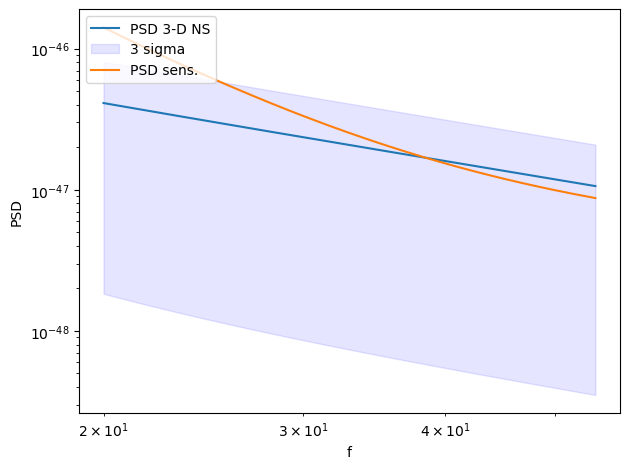

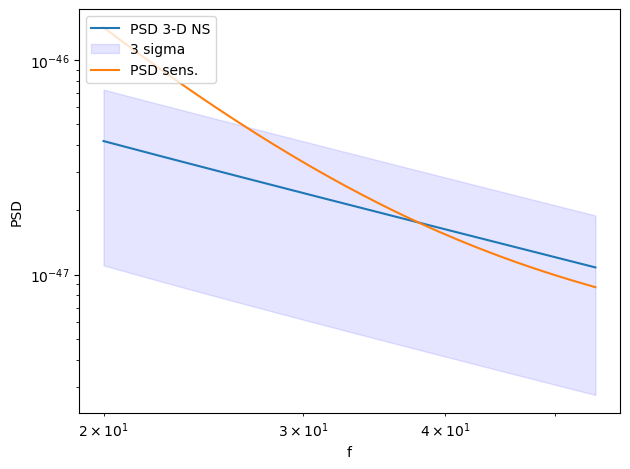

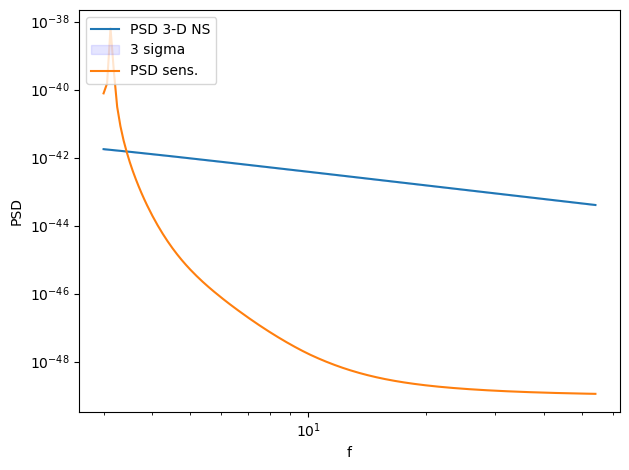

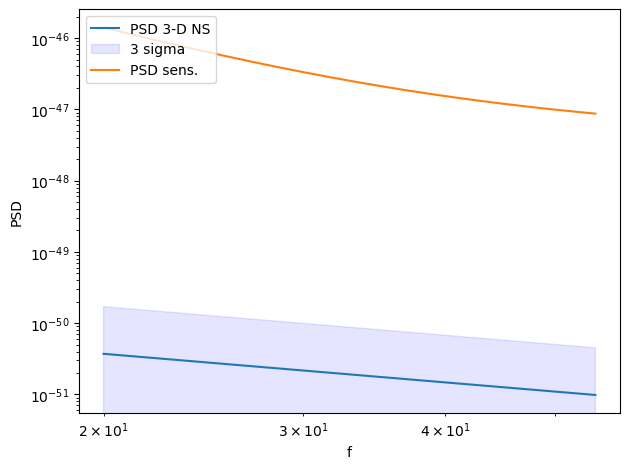

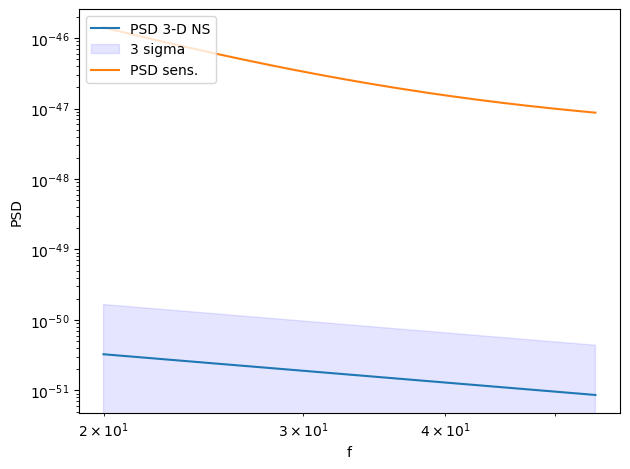

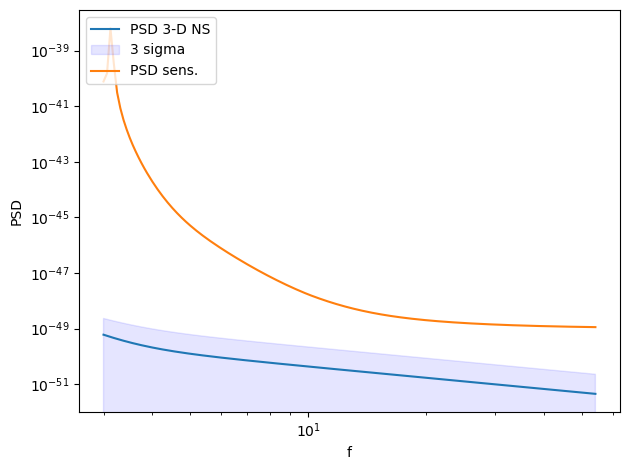

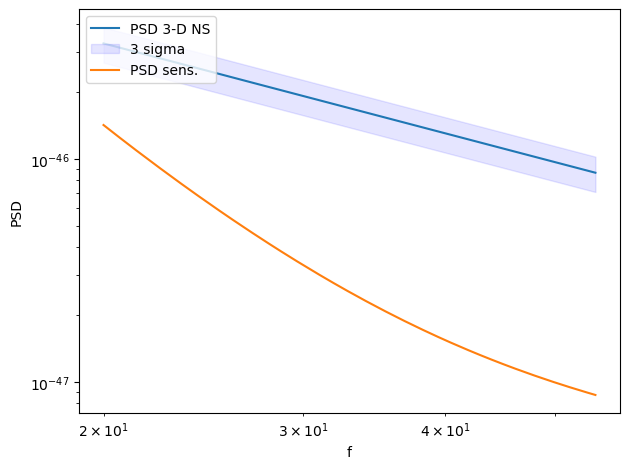

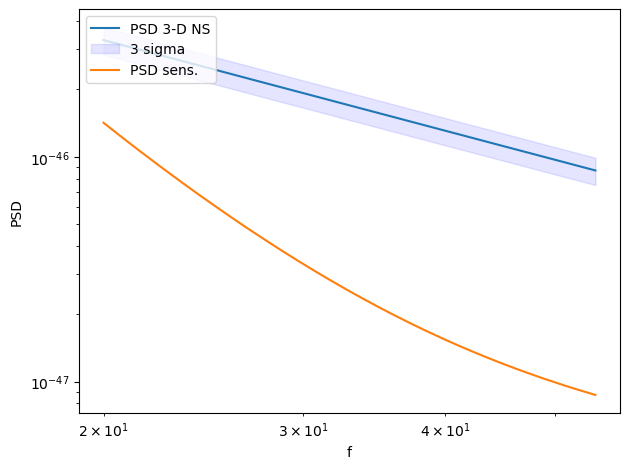

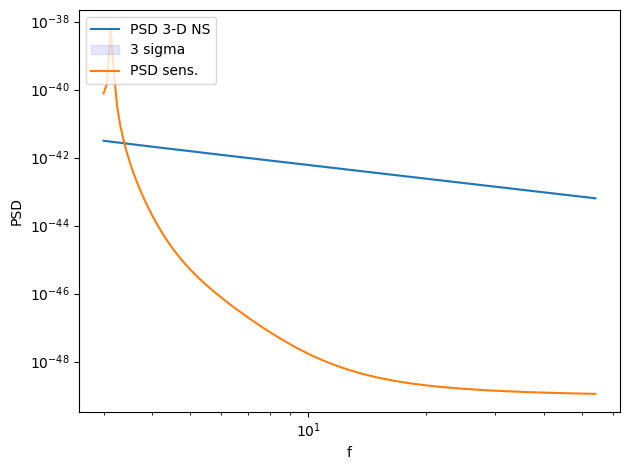

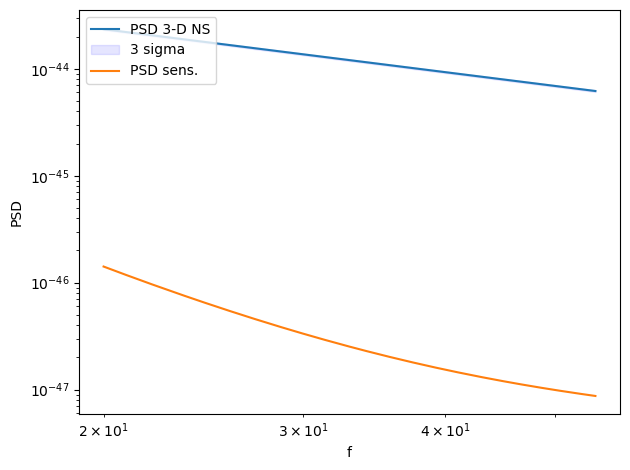

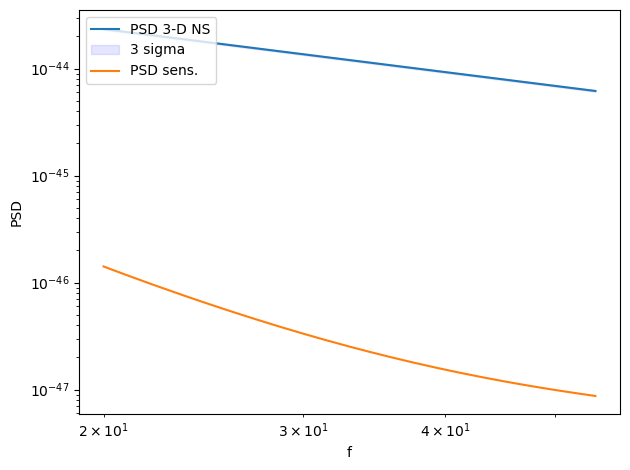

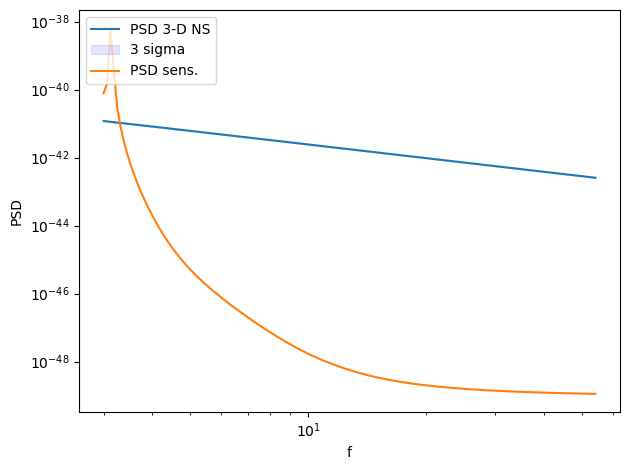

In [48]:
x1=f1
ys1=np.array(n3d1_mean)*x1
cis1 = 3*n3d1_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd1**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the 3-detector NS HLVK_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()
x1=f2
ys1=np.array(n3d2_mean)*x1
cis1 = 3*n3d2_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd2**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the 3-detector NS HLVKI_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()
x1=f3
ys1=np.array(n3d3_mean)*x1
cis1 = 3*n3d3_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd3**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the 3-detector NS ETCE_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()



x1=f1
ys1=np.array(s1_mean)*x1
cis1 = 3*s1_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd1**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the scalar 4-detector NS HLVK_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()
x1=f2
ys1=np.array(s2_mean)*x1
cis1 = 3*s2_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd2**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the scalar 4-detector NS HLVKI_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()
x1=f3
ys1=np.array(s3_mean)*x1
cis1 = 3*s3_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd3**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the scalar 4-detector NS ETCE_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()





x1=f1
ys1=np.array(v1_mean)*x1
cis1 = 3*v1_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd1**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the V 4-detector NS HLVK_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()
x1=f2
ys1=np.array(v2_mean)*x1
cis1 = 3*v2_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd2**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the V 4-detector NS HLVKI_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()
x1=f3
ys1=np.array(v3_mean)*x1
cis1 = 3*v3_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd3**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the V 4-detector NS ETCE_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()





x1=f1
ys1=np.array(w1_mean)*x1
cis1 = 3*w1_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd1**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the W 4-detector NS HLVK_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()
x1=f2
ys1=np.array(w2_mean)*x1
cis1 = 3*w2_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd2**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the W 4-detector NS HLVKI_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()
x1=f3
ys1=np.array(w3_mean)*x1
cis1 = 3*w3_std*x1
figs, axs = plt.subplots()
axs.plot(x1,ys1, label='PSD 3-D NS')
axs.fill_between(x1, (ys1-cis1), (ys1+cis1), color='b', alpha=.1, label='3 sigma')
plt.loglog(x1, noise_asd3**2, label='PSD sens.')
plt.xlabel('f', fontsize=10)
plt.ylabel('PSD', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
#plt.legend()
plt.legend(loc=2, prop={'size': 10})
figs.tight_layout()
plt.savefig(''.join(('PSD/PSD for the W 4-detector NS ETCE_', str(distanza_l) , '_', str(Mc_bbhf), '_', str(etazonz),'.png')))
plt.show()
plt.close()

In [49]:
s1_psnr_fres = s1_mean/(noise_asd1**2)
s1_psnr = df1*np.sum(s1_psnr_fres)
s2_psnr_fres = s2_mean/(noise_asd2**2)
s2_psnr = df2*np.sum(s2_psnr_fres)
s3_psnr_fres = s3_mean/(noise_asd3**2)
s3_psnr = df3*np.sum(s3_psnr_fres)
s1_psnr_fres, s2_psnr_fres, s3_psnr_fres=None, None, None
#s1_mean, s2_mean, s3_mean = None, None, None

v1_psnr_fres = v1_mean/(noise_asd1**2)
v1_psnr = df1*np.sum(v1_psnr_fres)
v2_psnr_fres = v2_mean/(noise_asd2**2)
v2_psnr = df2*np.sum(v2_psnr_fres)
v3_psnr_fres = v3_mean/(noise_asd3**2)
v3_psnr = df3*np.sum(v3_psnr_fres)
v1_psnr_fres, v2_psnr_fres, v3_psnr_fres=None, None, None
#v1_mean, v2_mean, v3_mean = None, None, None

w1_psnr_fres = w1_mean/(noise_asd1**2)
w1_psnr = df1*np.sum(w1_psnr_fres)
w2_psnr_fres = w2_mean/(noise_asd2**2)
w2_psnr = df2*np.sum(w2_psnr_fres)
w3_psnr_fres = w3_mean/(noise_asd3**2)
w3_psnr = df3*np.sum(w3_psnr_fres)
w1_psnr_fres, w2_psnr_fres, w3_psnr_fres=None, None, None
#w1_mean, w2_mean, w3_mean = None, None, None

n3d1_psnr_fres = n3d1_mean/(noise_asd1**2)
n3d1_psnr = df1*np.sum(n3d1_psnr_fres)
n3d2_psnr_fres = n3d2_mean/(noise_asd2**2)
n3d2_psnr = df2*np.sum(n3d2_psnr_fres)
n3d3_psnr_fres = n3d3_mean/(noise_asd3**2)
n3d3_psnr = df3*np.sum(n3d3_psnr_fres)
n3d1_psnr_fres, n3d2_psnr_fres, n3d3_psnr_fres=None, None, None
#n3d1_mean, n3d2_mean, n3d3_mean = None, None, None














s1_psnr_freserrm = (s1_mean-3*s1_std)/(noise_asd1**2)
s1_psnrerrm = df1*np.sum(s1_psnr_freserrm)
s2_psnr_freserrm = (s2_mean-3*s2_std)/(noise_asd2**2)
s2_psnrerrm = df2*np.sum(s2_psnr_freserrm)
s3_psnr_freserrm = (s3_mean-3*s3_std)/(noise_asd3**2)
s3_psnrerrm = df3*np.sum(s3_psnr_freserrm)
s1_psnr_freserrm, s2_psnr_freserrm, s3_psnr_freserrm=None, None, None

v1_psnr_freserrm = (v1_mean-3*v1_std)/(noise_asd1**2)
v1_psnrerrm = df1*np.sum(v1_psnr_freserrm)
v2_psnr_freserrm = (v2_mean-3*v2_std)/(noise_asd2**2)
v2_psnrerrm = df2*np.sum(v2_psnr_freserrm)
v3_psnr_freserrm = (v3_mean-3*v3_std)/(noise_asd3**2)
v3_psnrerrm = df3*np.sum(v3_psnr_freserrm)
v1_psnr_freserrm, v2_psnr_freserrm, v3_psnr_freserrm=None, None, None

w1_psnr_freserrm = (w1_mean-3*w1_std)/(noise_asd1**2)
w1_psnrerrm = df1*np.sum(w1_psnr_freserrm)
w2_psnr_freserrm = (w2_mean-3*w2_std)/(noise_asd2**2)
w2_psnrerrm = df2*np.sum(w2_psnr_freserrm)
w3_psnr_freserrm = (w3_mean-3*w3_std)/(noise_asd3**2)
w3_psnrerrm = df3*np.sum(w3_psnr_freserrm)
w1_psnr_freserrm, w2_psnr_freserrm, w3_psnr_freserrm=None, None, None

n3d1_psnr_freserrm = (n3d1_mean-3*n3d1_std)/(noise_asd1**2)
n3d1_psnrerrm = df1*np.sum(n3d1_psnr_freserrm)
n3d2_psnr_freserrm = (n3d2_mean-3*n3d2_std)/(noise_asd2**2)
n3d2_psnrerrm = df2*np.sum(n3d2_psnr_freserrm)
n3d3_psnr_freserrm = (n3d3_mean-3*n3d3_std)/(noise_asd3**2)
n3d3_psnrerrm = df3*np.sum(n3d3_psnr_freserrm)
n3d1_psnr_freserrm, n3d2_psnr_freserrm, n3d3_psnr_freserrm=None, None, None










s1_psnr_freserr = (s1_mean+3*s1_std)/(noise_asd1**2)
s1_psnrerr = df1*np.sum(s1_psnr_freserr)
s2_psnr_freserr = (s2_mean+3*s2_std)/(noise_asd2**2)
s2_psnrerr = df2*np.sum(s2_psnr_freserr)
s3_psnr_freserr = (s3_mean+3*s3_std)/(noise_asd3**2)
s3_psnrerr = df3*np.sum(s3_psnr_freserr)
s1_psnr_freserr, s2_psnr_freserr, s3_psnr_freserr=None, None, None

v1_psnr_freserr = (v1_mean+3*v1_std)/(noise_asd1**2)
v1_psnrerr = df1*np.sum(v1_psnr_freserr)
v2_psnr_freserr = (v2_mean+3*v2_std)/(noise_asd2**2)
v2_psnrerr = df2*np.sum(v2_psnr_freserr)
v3_psnr_freserr = (v3_mean+3*v3_std)/(noise_asd3**2)
v3_psnrerr = df3*np.sum(v3_psnr_freserr)
v1_psnr_freserr, v2_psnr_freserr, v3_psnr_freserr=None, None, None

w1_psnr_freserr = (w1_mean+3*w1_std)/(noise_asd1**2)
w1_psnrerr = df1*np.sum(w1_psnr_freserr)
w2_psnr_freserr = (w2_mean+3*w2_std)/(noise_asd2**2)
w2_psnrerr = df2*np.sum(w2_psnr_freserr)
w3_psnr_freserr = (w3_mean+3*w3_std)/(noise_asd3**2)
w3_psnrerr = df3*np.sum(w3_psnr_freserr)
w1_psnr_freserr, w2_psnr_freserr, w3_psnr_freserr=None, None, None

n3d1_psnr_freserr = (n3d1_mean+3*n3d1_std)/(noise_asd1**2)
n3d1_psnrerr = df1*np.sum(n3d1_psnr_freserr)
n3d2_psnr_freserr = (n3d2_mean+3*n3d2_std)/(noise_asd2**2)
n3d2_psnrerr = df2*np.sum(n3d2_psnr_freserr)
n3d3_psnr_freserr = (n3d3_mean+3*n3d3_std)/(noise_asd3**2)
n3d3_psnrerr = df3*np.sum(n3d3_psnr_freserr)
n3d1_psnr_freserr, n3d2_psnr_freserr, n3d3_psnr_freserr=None, None, None



'''
snr_sq_f_bns2=bns_mean2/(noise_asd_bns**2)
snr_sq_bns2=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns2)

snr_sq_f_bns3=bns_mean3/(noise_asd_bns**2)
snr_sq_bns3=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns3)

snr_sq_f_bns4=bns_mean4/(noise_asd_bns**2)
snr_sq_bns4=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns4)

snr_sq_f_bns5=bns_mean5/(noise_asd_bns**2)
snr_sq_bns5=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns5)

snr_sq_f_bns6=bns_mean6/(noise_asd_bns**2)
snr_sq_bns6=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns6)


snr_sq_f_bbh1=bbh_mean1/(noise_asd_bbh**2)
snr_sq_bbh1=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh1)

snr_sq_f_bbh2=bbh_mean2/(noise_asd_bbh**2)
snr_sq_bbh2=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh2)

snr_sq_f_bbh3=bbh_mean3/(noise_asd_bbh**2)
snr_sq_bbh3=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh3)

snr_sq_f_bbh4=bbh_mean4/(noise_asd_bbh**2)
snr_sq_bbh4=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh4)

snr_sq_f_bbh5=bbh_mean5/(noise_asd_bbh**2)
snr_sq_bbh5=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh5)

snr_sq_f_bbh6=bbh_mean6/(noise_asd_bbh**2)
snr_sq_bbh6=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh6)

snr_sq_f_bbh10=bbh_mean7/(noise_asd_bbh**2)
snr_sq_bbh10=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh10)

snr_sq_f_bbh11=bbh_mean8/(noise_asd_bbh**2)
snr_sq_bbh11=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh11)

snr_sq_f_bbh12=bbh_mean9/(noise_asd_bbh**2)
snr_sq_bbh12=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh12)

snr_sq_f_bns10=bns_mean7/(noise_asd_bns**2)
snr_sq_bns10=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns10)

snr_sq_f_bns11=bns_mean8/(noise_asd_bns**2)
snr_sq_bns11=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns11)

snr_sq_f_bns12=bns_mean9/(noise_asd_bns**2)
snr_sq_bns12=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns12)




snr_sq_f_bns1err=(bns_mean1-3*bns_std1)/(noise_asd_bns**2)
snr_sq_bns1err=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns1err)

snr_sq_f_bns2err=(bns_mean2-3*bns_std2)/(noise_asd_bns**2)
snr_sq_bns2err=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns2err)

snr_sq_f_bns3err=(bns_mean3-3*bns_std3)/(noise_asd_bns**2)
snr_sq_bns3err=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns3err)

snr_sq_f_bns4err=(bns_mean4-3*bns_std4)/(noise_asd_bns**2)
snr_sq_bns4err=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns4err)

snr_sq_f_bns5err=(bns_mean5-3*bns_std5)/(noise_asd_bns**2)
snr_sq_bns5err=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns5err)

snr_sq_f_bns6err=(bns_mean6-3*bns_std6)/(noise_asd_bns**2)
snr_sq_bns6err=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns6err)


snr_sq_f_bbh1err=(bbh_mean1-3*bbh_std1)/(noise_asd_bbh**2)
snr_sq_bbh1err=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh1err)

snr_sq_f_bbh2err=(bbh_mean2-3*bbh_std2)/(noise_asd_bbh**2)
snr_sq_bbh2err=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh2err)

snr_sq_f_bbh3err=(bbh_mean3-3*bbh_std3)/(noise_asd_bbh**2)
snr_sq_bbh3err=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh3err)

snr_sq_f_bbh4err=(bbh_mean4-3*bbh_std4)/(noise_asd_bbh**2)
snr_sq_bbh4err=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh4err)

snr_sq_f_bbh5err=(bbh_mean5-3*bbh_std5)/(noise_asd_bbh**2)
snr_sq_bbh5err=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh5err)

snr_sq_f_bbh6err=(bbh_mean6-3*bbh_std6)/(noise_asd_bbh**2)
snr_sq_bbh6err=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh6err)



snr_sq_f_bbh10err=(bbh_mean7-3*bbh_std7)/(noise_asd_bbh**2)
snr_sq_bbh10err=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh10)

snr_sq_f_bbh11err=(bbh_mean8-3*bbh_std8)/(noise_asd_bbh**2)
snr_sq_bbh11err=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh11)

snr_sq_f_bbh12err=(bbh_mean9-3*bbh_std9)/(noise_asd_bbh**2)
snr_sq_bbh12err=(xx_bbh[1]-xx_bbh[0])*np.sum(snr_sq_f_bbh12)

snr_sq_f_bns10err=(bns_mean7-3*bns_std7)/(noise_asd_bns**2)
snr_sq_bns10err=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns10)

snr_sq_f_bns11err=(bns_mean8-3*bns_std8)/(noise_asd_bns**2)
snr_sq_bns11err=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns11)

snr_sq_f_bns12err=(bns_mean9-3*bns_std9)/(noise_asd_bns**2)
snr_sq_bns12err=(xx_bns[1]-xx_bns[0])*np.sum(snr_sq_f_bns12)


'''

sys.stdout.flush()
print('HLVK')
print('SNR1 (3 dets.)= ',n3d1_psnr, 'f_bins= ', len(f1), 'f_av_SNR= ', n3d1_psnr/len(f1))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVK_dev_s1_3dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl1), '   ', str(err_m1), '   ', 
                            str(err_eta1), '   ' , str(area1), '  ' , str(len(f1)), '    ', str(n3d1_psnr), '    ',
                            str(n3d1_psnr/len(f1)) , '    ' , str(n3d1_psnrerr), '  ', 
                            str(n3d1_psnrerr/len(f1)) , '    ' , str(n3d1_psnrerrm), '  ', str(n3d1_psnrerrm/len(f1)),'\n')))
print('SNRs (4 dets.)= ',s1_psnr, 'f_bins= ', len(f1), 'f_av_SNR= ', s1_psnr/len(f1))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVK_dev_s1_s4dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl1), '   ', str(err_m1), '   ', 
                            str(err_eta1), '   ' , str(area1), '  ' , str(len(f1)), '    ', str(s1_psnr), '    ',
                            str(s1_psnr/len(f1)) , '    ' , str(s1_psnrerr), '  ', 
                            str(s1_psnrerr/len(f1)) , '    ' , str(s1_psnrerrm), '  ', str(s1_psnrerrm/len(f1)),'\n')))
print('SNRv (4 dets.)= ',v1_psnr, 'f_bins= ', len(f1), 'f_av_SNR= ', v1_psnr/len(f1))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVK_dev_s1_v4dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl1), '   ', str(err_m1), '   ', 
                            str(err_eta1), '   ' , str(area1), '  ' , str(len(f1)), '    ', str(v1_psnr), '    ',
                            str(v1_psnr/len(f1)) , '    ' , str(v1_psnrerr), '  ', 
                            str(v1_psnrerr/len(f1)) , '    ' , str(v1_psnrerrm), '  ', str(v1_psnrerrm/len(f1)),'\n')))
print('SNRw (4 dets.)= ',w1_psnr, 'f_bins= ', len(f1), 'f_av_SNR= ', w1_psnr/len(f1))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVK_dev_s1_w4dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl1), '   ', str(err_m1), '   ', 
                            str(err_eta1), '   ' , str(area1), '  ' , str(len(f1)), '    ', str(w1_psnr), '    ',
                            str(w1_psnr/len(f1)) , '    ' , str(w1_psnrerr), '  ', 
                            str(w1_psnrerr/len(f1)) , '    ' , str(w1_psnrerrm), '  ', str(w1_psnrerrm/len(f1)),'\n')))





sys.stdout.flush()
print('HLVKI')
print('SNR1 (3 dets.)= ',n3d2_psnr, 'f_bins= ', len(f2), 'f_av_SNR= ', n3d2_psnr/len(f2))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVKI_dev_s1_3dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl2), '   ', str(err_m2), '   ', 
                            str(err_eta2), '   ' , str(area2), '  ' , str(len(f2)), '    ', str(n3d2_psnr), '    ',
                            str(n3d2_psnr/len(f2)) , '    ' , str(n3d2_psnrerr), '  ', 
                            str(n3d2_psnrerr/len(f2)) , '    ' , str(n3d2_psnrerrm), '  ', str(n3d2_psnrerrm/len(f2)),'\n')))
print('SNRs (4 dets.)= ',s2_psnr, 'f_bins= ', len(f2), 'f_av_SNR= ', s2_psnr/len(f2))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVKI_dev_s1_s4dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl2), '   ', str(err_m2), '   ', 
                            str(err_eta2), '   ' , str(area2), '  ' , str(len(f2)), '    ', str(s2_psnr), '    ',
                            str(s2_psnr/len(f2)) , '    ' , str(s2_psnrerr), '  ', 
                            str(s2_psnrerr/len(f2)) , '    ' , str(s2_psnrerrm), '  ', str(s2_psnrerrm/len(f2)),'\n')))
print('SNRv (4 dets.)= ',v2_psnr, 'f_bins= ', len(f2), 'f_av_SNR= ', v2_psnr/len(f2))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVKI_dev_s1_v4dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl2), '   ', str(err_m2), '   ', 
                            str(err_eta2), '   ' , str(area2), '  ' , str(len(f2)), '    ', str(v2_psnr), '    ',
                            str(v2_psnr/len(f2)) , '    ' , str(v2_psnrerr), '  ', 
                            str(v2_psnrerr/len(f2)) , '    ' , str(v2_psnrerrm), '  ', str(v2_psnrerrm/len(f2)),'\n')))
print('SNRw (4 dets.)= ',w2_psnr, 'f_bins= ', len(f2), 'f_av_SNR= ', w2_psnr/len(f2))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVKI_dev_s1_w4dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl2), '   ', str(err_m2), '   ', 
                            str(err_eta2), '   ' , str(area2), '  ' , str(len(f2)), '    ', str(w2_psnr), '    ',
                            str(w2_psnr/len(f2)) , '    ' , str(w2_psnrerr), '  ', 
                            str(w2_psnrerr/len(f2)) , '    ' , str(w2_psnrerrm), '  ', str(w2_psnrerrm/len(f2)),'\n')))
    
    

    


sys.stdout.flush()
print('ETCE')
print('SNR1 (3 dets.)= ',n3d3_psnr, 'f_bins= ', len(f3), 'f_av_SNR= ', n3d3_psnr/len(f3))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "ETCE_dev_s1_3dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl3), '   ', str(err_m3), '   ', 
                            str(err_eta3), '   ' , str(area3), '  ' , str(len(f3)), '    ', str(n3d3_psnr), '    ',
                            str(n3d3_psnr/len(f3)) , '    ' , str(n3d3_psnrerr), '  ', 
                            str(n3d3_psnrerr/len(f3)) , '    ' , str(n3d3_psnrerrm), '  ', str(n3d3_psnrerrm/len(f3)),'\n')))
print('SNRs (4 dets.)= ',s3_psnr, 'f_bins= ', len(f3), 'f_av_SNR= ', s3_psnr/len(f3))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "ETCE_dev_s1_s4dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl3), '   ', str(err_m3), '   ', 
                            str(err_eta3), '   ' , str(area3), '  ' , str(len(f3)), '    ', str(s3_psnr), '    ',
                            str(s3_psnr/len(f3)) , '    ' , str(s3_psnrerr), '  ', 
                            str(s3_psnrerr/len(f3)) , '    ' , str(s3_psnrerrm), '  ', str(s3_psnrerrm/len(f3)),'\n')))
print('SNRv (4 dets.)= ',v3_psnr, 'f_bins= ', len(f3), 'f_av_SNR= ', v3_psnr/len(f3))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "ETCE_dev_s1_v4dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl3), '   ', str(err_m3), '   ', 
                            str(err_eta3), '   ' , str(area3), '  ' , str(len(f3)), '    ', str(v3_psnr), '    ',
                            str(v3_psnr/len(f3)) , '    ' , str(v3_psnrerr), '  ', 
                            str(v3_psnrerr/len(f3)) , '    ' , str(v3_psnrerrm), '  ', str(v3_psnrerrm/len(f3)),'\n')))
print('SNRw (4 dets.)= ',w3_psnr, 'f_bins= ', len(f3), 'f_av_SNR= ', w3_psnr/len(f3))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "ETCE_dev_s1_w4dets.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l), '   ', str(err_dl3), '   ', str(err_m3), '   ', 
                            str(err_eta3), '   ' , str(area3), '  ' , str(len(f3)), '    ', str(w3_psnr), '    ',
                            str(w3_psnr/len(f3)) , '    ' , str(w3_psnrerr), '  ', 
                            str(w3_psnrerr/len(f3)) , '    ' , str(w3_psnrerrm), '  ', str(w3_psnrerrm/len(f3)),'\n')))
 
    
'''
    
print('SNR2= ',snr_sq_bbh2, 'f_bins= ',len(xx_bbh), 'f_av_SNR= ',snr_sq_bbh2/len(xx_bbh))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVK_dev_s1_SNR2.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l_bbh), '   ', str(err_dl_bbh), '   ', str(err_m_bbh), '   ', str(err_eta_bbh), '   ' , str(area_bbh), '   ' , str(len(xx_bbh)), '    ', str(snr_sq_bbh2), '    ', str(snr_sq_bbh2/len(xx_bbh)) , '    ' , str(snr_sq_bbh2err), '  ', str(snr_sq_bbh2err/len(xx_bbh)),'\n')))
print('SNR3= ',snr_sq_bbh3, 'f_bins= ',len(xx_bbh), 'f_av_SNR= ',snr_sq_bbh3/len(xx_bbh))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVK_dev_s1_SNR3.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l_bbh), '   ', str(err_dl_bbh), '   ', str(err_m_bbh), '   ', str(err_eta_bbh), '   ' , str(area_bbh), '   ' , str(len(xx_bbh)), '    ', str(snr_sq_bbh3), '    ', str(snr_sq_bbh3/len(xx_bbh)) , '    ' , str(snr_sq_bbh3err), '  ', str(snr_sq_bbh3err/len(xx_bbh)),'\n')))
print('SNR4= ',snr_sq_bbh12, 'f_bins= ',len(xx_bbh), 'f_av_SNR= ',snr_sq_bbh12/len(xx_bbh))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVK_dev_s1_SNR4.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l_bbh), '   ', str(err_dl_bbh), '   ', str(err_m_bbh), '   ', str(err_eta_bbh), '   ' , str(area_bbh), '   ' , str(len(xx_bbh)), '    ', str(snr_sq_bbh12), '    ', str(snr_sq_bbh12/len(xx_bbh)) , '    ' , str(snr_sq_bbh12err), '  ', str(snr_sq_bbh12err/len(xx_bbh)),'\n')))
print('SNR5= ',snr_sq_bbh11, 'f_bins= ',len(xx_bbh), 'f_av_SNR= ',snr_sq_bbh11/len(xx_bbh))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVK_dev_s1_SNR5.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l_bbh), '   ', str(err_dl_bbh), '   ', str(err_m_bbh), '   ', str(err_eta_bbh), '   ' , str(area_bbh), '   ' , str(len(xx_bbh)), '    ', str(snr_sq_bbh11), '    ', str(snr_sq_bbh11/len(xx_bbh)) , '    ' , str(snr_sq_bbh11err), '  ', str(snr_sq_bbh11err/len(xx_bbh)),'\n')))
print('SNR6= ',snr_sq_bbh10, 'f_bins= ',len(xx_bbh), 'f_av_SNR= ',snr_sq_bbh10/len(xx_bbh))
with open("".join(('dl/' , str(Mc_bbhf), ' ', str(etazonz), '_', "HLVK_dev_s1_SNR6.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l_bbh), '   ', str(err_dl_bbh), '   ', str(err_m_bbh), '   ', str(err_eta_bbh), '   ' , str(area_bbh), '   ' , str(len(xx_bbh)), '    ', str(snr_sq_bbh10), '    ', str(snr_sq_bbh10/len(xx_bbh)) , '    ' , str(snr_sq_bbh10err), '  ', str(snr_sq_bbh10err/len(xx_bbh)),'\n')))
print('BNS')
print('SNR1= ',snr_sq_bns1, 'f_bins= ',len(xx_bns), 'f_av_SNR= ', snr_sq_bns1/len(xx_bns))
with open("".join(('dl/' , str(Mc_bnsf), ' ', str(etazonz), '_', "HLVK_dev_s1_SNR1.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l_bns), '   ', str(err_dl_bns), '   ', str(err_m_bns), '   ', str(err_eta_bns), '   ' , str(area_bns), '   ' , str(len(xx_bns)), '    ', str(snr_sq_bns1), '    ', str(snr_sq_bns1/len(xx_bns)) , '    ' , str(snr_sq_bns1err), '  ', str(snr_sq_bns1err/len(xx_bns)),'\n')))
print('SNR2= ',snr_sq_bns2, 'f_bins= ',len(xx_bns), 'f_av_SNR= ',snr_sq_bns2/len(xx_bns))
with open("".join(('dl/' , str(Mc_bnsf), ' ', str(etazonz), '_', "HLVK_dev_s1_SNR2.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l_bns), '   ', str(err_dl_bns), '   ', str(err_m_bns), '   ', str(err_eta_bns), '   ' , str(area_bns), '   ' , str(len(xx_bns)), '    ', str(snr_sq_bns2), '    ', str(snr_sq_bns2/len(xx_bns)) , '    ' , str(snr_sq_bns2err), '  ', str(snr_sq_bns2err/len(xx_bns)),'\n')))
print('SNR3= ',snr_sq_bns3, 'f_bins= ',len(xx_bns), 'f_av_SNR= ',snr_sq_bns3/len(xx_bns))
with open("".join(('dl/' , str(Mc_bnsf), ' ', str(etazonz), '_', "HLVK_dev_s1_SNR3.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l_bns), '   ', str(err_dl_bns), '   ', str(err_m_bns), '   ', str(err_eta_bns), '   ' , str(area_bns), '   ' , str(len(xx_bns)), '    ', str(snr_sq_bns3), '    ', str(snr_sq_bns3/len(xx_bns)) , '    ' , str(snr_sq_bns3err), '  ', str(snr_sq_bns3err/len(xx_bns)),'\n')))
print('SNR4= ',snr_sq_bns12, 'f_bins= ',len(xx_bns), 'f_av_SNR= ',snr_sq_bns12/len(xx_bns))
with open("".join(('dl/' , str(Mc_bnsf), ' ', str(etazonz), '_', "HLVK_dev_s1_SNR4.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l_bns), '   ', str(err_dl_bns), '   ', str(err_m_bns), '   ', str(err_eta_bns), '   ' , str(area_bns), '   ' , str(len(xx_bns)), '    ', str(snr_sq_bns12), '    ', str(snr_sq_bns12/len(xx_bns)) , '    ' , str(snr_sq_bns12err), '  ', str(snr_sq_bns12err/len(xx_bns)),'\n')))
print('SNR5= ',snr_sq_bns11, 'f_bins= ',len(xx_bns), 'f_av_SNR= ',snr_sq_bns11/len(xx_bns))
with open("".join(('dl/' , str(Mc_bnsf), ' ', str(etazonz), '_', "HLVK_dev_s1_SNR5.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l_bns), '   ', str(err_dl_bns), '   ', str(err_m_bns), '   ', str(err_eta_bns), '   ' , str(area_bns), '   ' , str(len(xx_bns)), '    ', str(snr_sq_bns11), '    ', str(snr_sq_bns11/len(xx_bns)) , '    ' , str(snr_sq_bns11err), '  ', str(snr_sq_bns11err/len(xx_bns)),'\n')))
print('SNR6= ',snr_sq_bns10, 'f_bins= ',len(xx_bns), 'f_av_SNR= ',snr_sq_bns10/len(xx_bns))
with open("".join(('dl/' , str(Mc_bnsf), ' ', str(etazonz), '_', "HLVK_dev_s1_SNR6.txt")), 'a') as datafile:
    datafile.write(''.join((str(distanza_l_bns), '   ', str(err_dl_bns), '   ', str(err_m_bns), '   ', str(err_eta_bns), '   ' , str(area_bns), '   ' , str(len(xx_bns)), '    ', str(snr_sq_bns10), '    ', str(snr_sq_bns10/len(xx_bbh)) , '    ' , str(snr_sq_bns10err), '  ', str(snr_sq_bns10err/len(xx_bns)),'\n')))

t=time.time()-start
print('Finish !! ',t,'s')
sys.stdout.flush()
for j in range (0,ntot):
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's99_bns' , str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's100_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's99_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's100_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's1_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's2_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's3_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's4_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 's5_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's1_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's2_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's3_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's4_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 's5_bbh', str(j), '.npy')))

    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd4_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd5_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd6_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd7_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd8_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd9_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd10_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd11_bns', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bnsf),'_s_',str(distanza_l_bns), '_OF_', str(inj_params_bns['eta']),'_' , 'sd12_bns', str(j), '.npy')))

    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd4_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd5_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd6_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd7_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd8_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd9_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd10_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd11_bbh', str(j), '.npy')))
    os.remove(''.join(('datafiles/', str(Mc_bbhf),'_s_',str(distanza_l_bbh), '_OF_', str(inj_params_bbh['eta']),'_' , 'sd12_bbh', str(j), '.npy')))





'''



# In[ ]:


HLVK
SNR1 (3 dets.)=  0.7996764164084733 f_bins=  549 f_av_SNR=  0.0014566054943688038
SNRs (4 dets.)=  7.364996945594285e-05 f_bins=  549 f_av_SNR=  1.341529498286755e-07
SNRv (4 dets.)=  6.489427082804622 f_bins=  549 f_av_SNR=  0.01182045005975341
SNRw (4 dets.)=  464.02509181637043 f_bins=  549 f_av_SNR=  0.8452187464779061
HLVKI
SNR1 (3 dets.)=  0.8126304002175676 f_bins=  549 f_av_SNR=  0.001480201093292473
SNRs (4 dets.)=  6.468160559277021e-05 f_bins=  549 f_av_SNR=  1.1781713222726814e-07
SNRv (4 dets.)=  6.515699302270239 f_bins=  549 f_av_SNR=  0.01186830474001865
SNRw (4 dets.)=  463.0938919822569 f_bins=  549 f_av_SNR=  0.8435225719166792
ETCE
SNR1 (3 dets.)=  1008902.1294943213 f_bins=  821 f_av_SNR=  1228.8698288603182
SNRs (4 dets.)=  0.011299461017982827 f_bins=  821 f_av_SNR=  1.3763046306921836e-05
SNRv (4 dets.)=  1589875.0953455893 f_bins=  821 f_av_SNR=  1936.5104693612539
SNRw (4 dets.)=  6383069.937061152 f_bins=  821 f_av_SNR=  7774.750227845496


'\n    \nprint(\'SNR2= \',snr_sq_bbh2, \'f_bins= \',len(xx_bbh), \'f_av_SNR= \',snr_sq_bbh2/len(xx_bbh))\nwith open("".join((\'dl/\' , str(Mc_bbhf), \' \', str(etazonz), \'_\', "HLVK_dev_s1_SNR2.txt")), \'a\') as datafile:\n    datafile.write(\'\'.join((str(distanza_l_bbh), \'   \', str(err_dl_bbh), \'   \', str(err_m_bbh), \'   \', str(err_eta_bbh), \'   \' , str(area_bbh), \'   \' , str(len(xx_bbh)), \'    \', str(snr_sq_bbh2), \'    \', str(snr_sq_bbh2/len(xx_bbh)) , \'    \' , str(snr_sq_bbh2err), \'  \', str(snr_sq_bbh2err/len(xx_bbh)),\'\n\')))\nprint(\'SNR3= \',snr_sq_bbh3, \'f_bins= \',len(xx_bbh), \'f_av_SNR= \',snr_sq_bbh3/len(xx_bbh))\nwith open("".join((\'dl/\' , str(Mc_bbhf), \' \', str(etazonz), \'_\', "HLVK_dev_s1_SNR3.txt")), \'a\') as datafile:\n    datafile.write(\'\'.join((str(distanza_l_bbh), \'   \', str(err_dl_bbh), \'   \', str(err_m_bbh), \'   \', str(err_eta_bbh), \'   \' , str(area_bbh), \'   \' , str(len(xx_bbh)), \'    \', str(snr_sq_bbh3), \'    \', str(snr